#**Business Problem**

Customer churn poses a significant risk for financial institutions, resulting in revenue loss. This project is of utmost importance for the banking institution, as it has the potential to enhance customer retention and drive profitability. By creating a reliable churn classification model, we can help institutions proactively address customer concerns and foster lasting relationships. The model enables targeted retention strategies, boosting customer satisfaction and loyalty.


In this comprehensive analysis, the focus was on identifying the factors contributing to customer churn within financial institutions, specifically in the credit card system, using machine learning models. The process involved various stages, including exploratory data analysis, data preprocessing, classifier evaluation, feature importance selection, and hyperparameter tuning. Among the 10 classifiers evaluated, the Light GBM model emerged as the top performer, boasting the highest recall score of 0.893 and the highest F1 score of 0.888. Further optimization through a grid search enhanced its performance.

Moreover, the analysis pinpointed six key features that significantly influence customer churn in the credit card system: 'Total_Trans_Ct,' 'Total_Trans_Amt,' 'Total_Revolving_Bal,' 'Total_Ct_Chng_Q4_Q1,' 'Avg_Utilization_Ratio,' and 'Total_Relationship_Count.' By strategically monitoring and addressing these variables, financial institutions can effectively mitigate churn and improve customer retention rates. After eliminating insignificant features, the model achieved a recall score of 0.889, and the learning curve demonstrated a significant reduction in the gap between the training set (Recall: 0.96) and the test set (Recall: 1), indicating improved generalization.

This project provides valuable insights and recommendations for financial institutions to combat customer churn, ultimately leading to enhanced customer retention and profitability in the credit card system.




#**Dataset**

The credit card churn dataset consists of 10,000 customers and 18 features, including age, salary, marital_status, credit card limit, and credit card category, among others. With only 16.07% of customers having churned, the dataset presents a class imbalance challenge, making it difficult to train the model to predict churning customers effectively.


Data source: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?datasetId=982921&sortBy=voteCount&select=BankChurners.csv

The features in the data set are as follows:
- CLIENTNUM - Client number. Unique identifier for the customer holding the account.
- Attrition_Flag - Internal event (customer activity) variable - if the account is closed then 1 else 0.
- Customer_Age - Demographic variable - Customer's Age in Years.
- Gender - Demographic variable - M=Male, F=Female.
- Dependent_count - Demographic variable - Number of dependents.
- Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school).
- Marital_Status - Demographic variable - Married, Single, Divorced, Unknown.
- Income_Category - Demographic variable - Annual Income Category of the account holder.
- Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum).
- Months_on_book - Period of relationship with bank.
- Total_Relationship_Count - Total no. of products held by the customer.
- Months_Inactive_12_mon - No. of months inactive in the last 12 months.
- Contacts_Count_12_mon - No. of Contacts in the last 12 months.
- Credit_Limit - Credit Limit on the Credit Card.
- Total_Revolving_Bal - Total Revolving Balance on the Credit Card.
- Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months).
- Total_Amt_Chng_Q4_Q1 - Open to Buy Credit Line (Average of last 12 months).
- Total_Trans_Amt - Total Transaction Amount (Last 12 months).
- Total_Trans_Ct - Total Transaction Count (Last 12 months).
- Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1).
- Avg_Utilization_Ratio - Average Card Utilization Ratio.

#**Metric Selection**
In our classification model, we deemed “Recall” as the principal evaluation metric. Recall measures the proportion of true positive predictions among all actual positive instances, as well as the proportion of true negative predictions among all actual negative instances. When using recall, we aim to accurately assess the model's performance in correctly identifying the false negatives, that is to what extent the " attrite customers" is identified as "existing customers". Additionally, when presenting the leaderboard and learning curve, F1 is introduced as supplementary references as it maintains a balance between the precision and recall.


#**Library**

In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
from scipy.stats import boxcox
from scipy.stats import skew
from matplotlib.pyplot import figure

In [ ]:
# sklearn
# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
# imblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
# Other classifiers
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [4]:
import plotly.graph_objects as go
import plotly.express as px
!pip install sweetviz
import sweetviz as sv
!pip install pycaret
from pycaret.classification import *
!pip install fancyimpute
from fancyimpute import KNN
!pip install -q psynlig
!pip install autoviz --upgrade
%matplotlib inline
from autoviz.AutoViz_Class import AutoViz_Class
!pip install shap
import shap

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Read
file_ = "drive/My Drive/Colab Notebooks/Big Data ML/Wow Project/BankChurners.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dropping the last two columns and the client number column
df = df.iloc[:,1:-2]

#**EDA**

The dataset from Kaggle: ‘Credit Card Customers’ has 10127 instances and 23 features. The last two columns and the client number column are dropped, as they do not provide significant importance for modeling purpose. The EDA process reveals that the dataset has no duplicates and missing values, but it does have skewness that are greater than 1 for several features. Additionally, the targeting variable “Attrition flag” has serious imbalance problem: with 8500 in “Existing Customer” and 1627 in “Attrited Customer”. This severe class imbalance poses a challenge for building an accurate predictive model, as it may result in biased predictions favoring the majority class. Addressing this class imbalance will be a critical step in developing a reliable churn prediction model.


In [ ]:
# Examine the data using df.head() or df.tail()
print("HEAD of df\n", df.head(5))
#print("\nTAIL of df\n", df.tail())

# Shape of DataFrame
print("\nSHAPE of df\n", df.shape)

HEAD of df
    CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0

In [ ]:
df.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


###Missing Values, Duplicates

In [ ]:
# Check data types
print(df.info())

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

# Missing value heatmap
# plt.figure(figsize=(10,6))
# sns.heatmap(df.isna().transpose(),
#             cmap="YlGnBu",
#             cbar_kws={'label': 'Missing Data Heatmap'})
# plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


###Descriptive Statistics

In [ ]:
pd.set_option('display.max_columns', None)

print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

UNIVARIATE DESCRIPTIVE STAT using pandas
                             count unique                top  freq  \
Attrition_Flag              10127      2  Existing Customer  8500   
Customer_Age              10127.0    NaN                NaN   NaN   
Gender                      10127      2                  F  5358   
Dependent_count           10127.0    NaN                NaN   NaN   
Education_Level             10127      7           Graduate  3128   
Marital_Status              10127      4            Married  4687   
Income_Category             10127      6     Less than $40K  3561   
Card_Category               10127      4               Blue  9436   
Months_on_book            10127.0    NaN                NaN   NaN   
Total_Relationship_Count  10127.0    NaN                NaN   NaN   
Months_Inactive_12_mon    10127.0    NaN                NaN   NaN   
Contacts_Count_12_mon     10127.0    NaN                NaN   NaN   
Credit_Limit              10127.0    NaN                NaN  

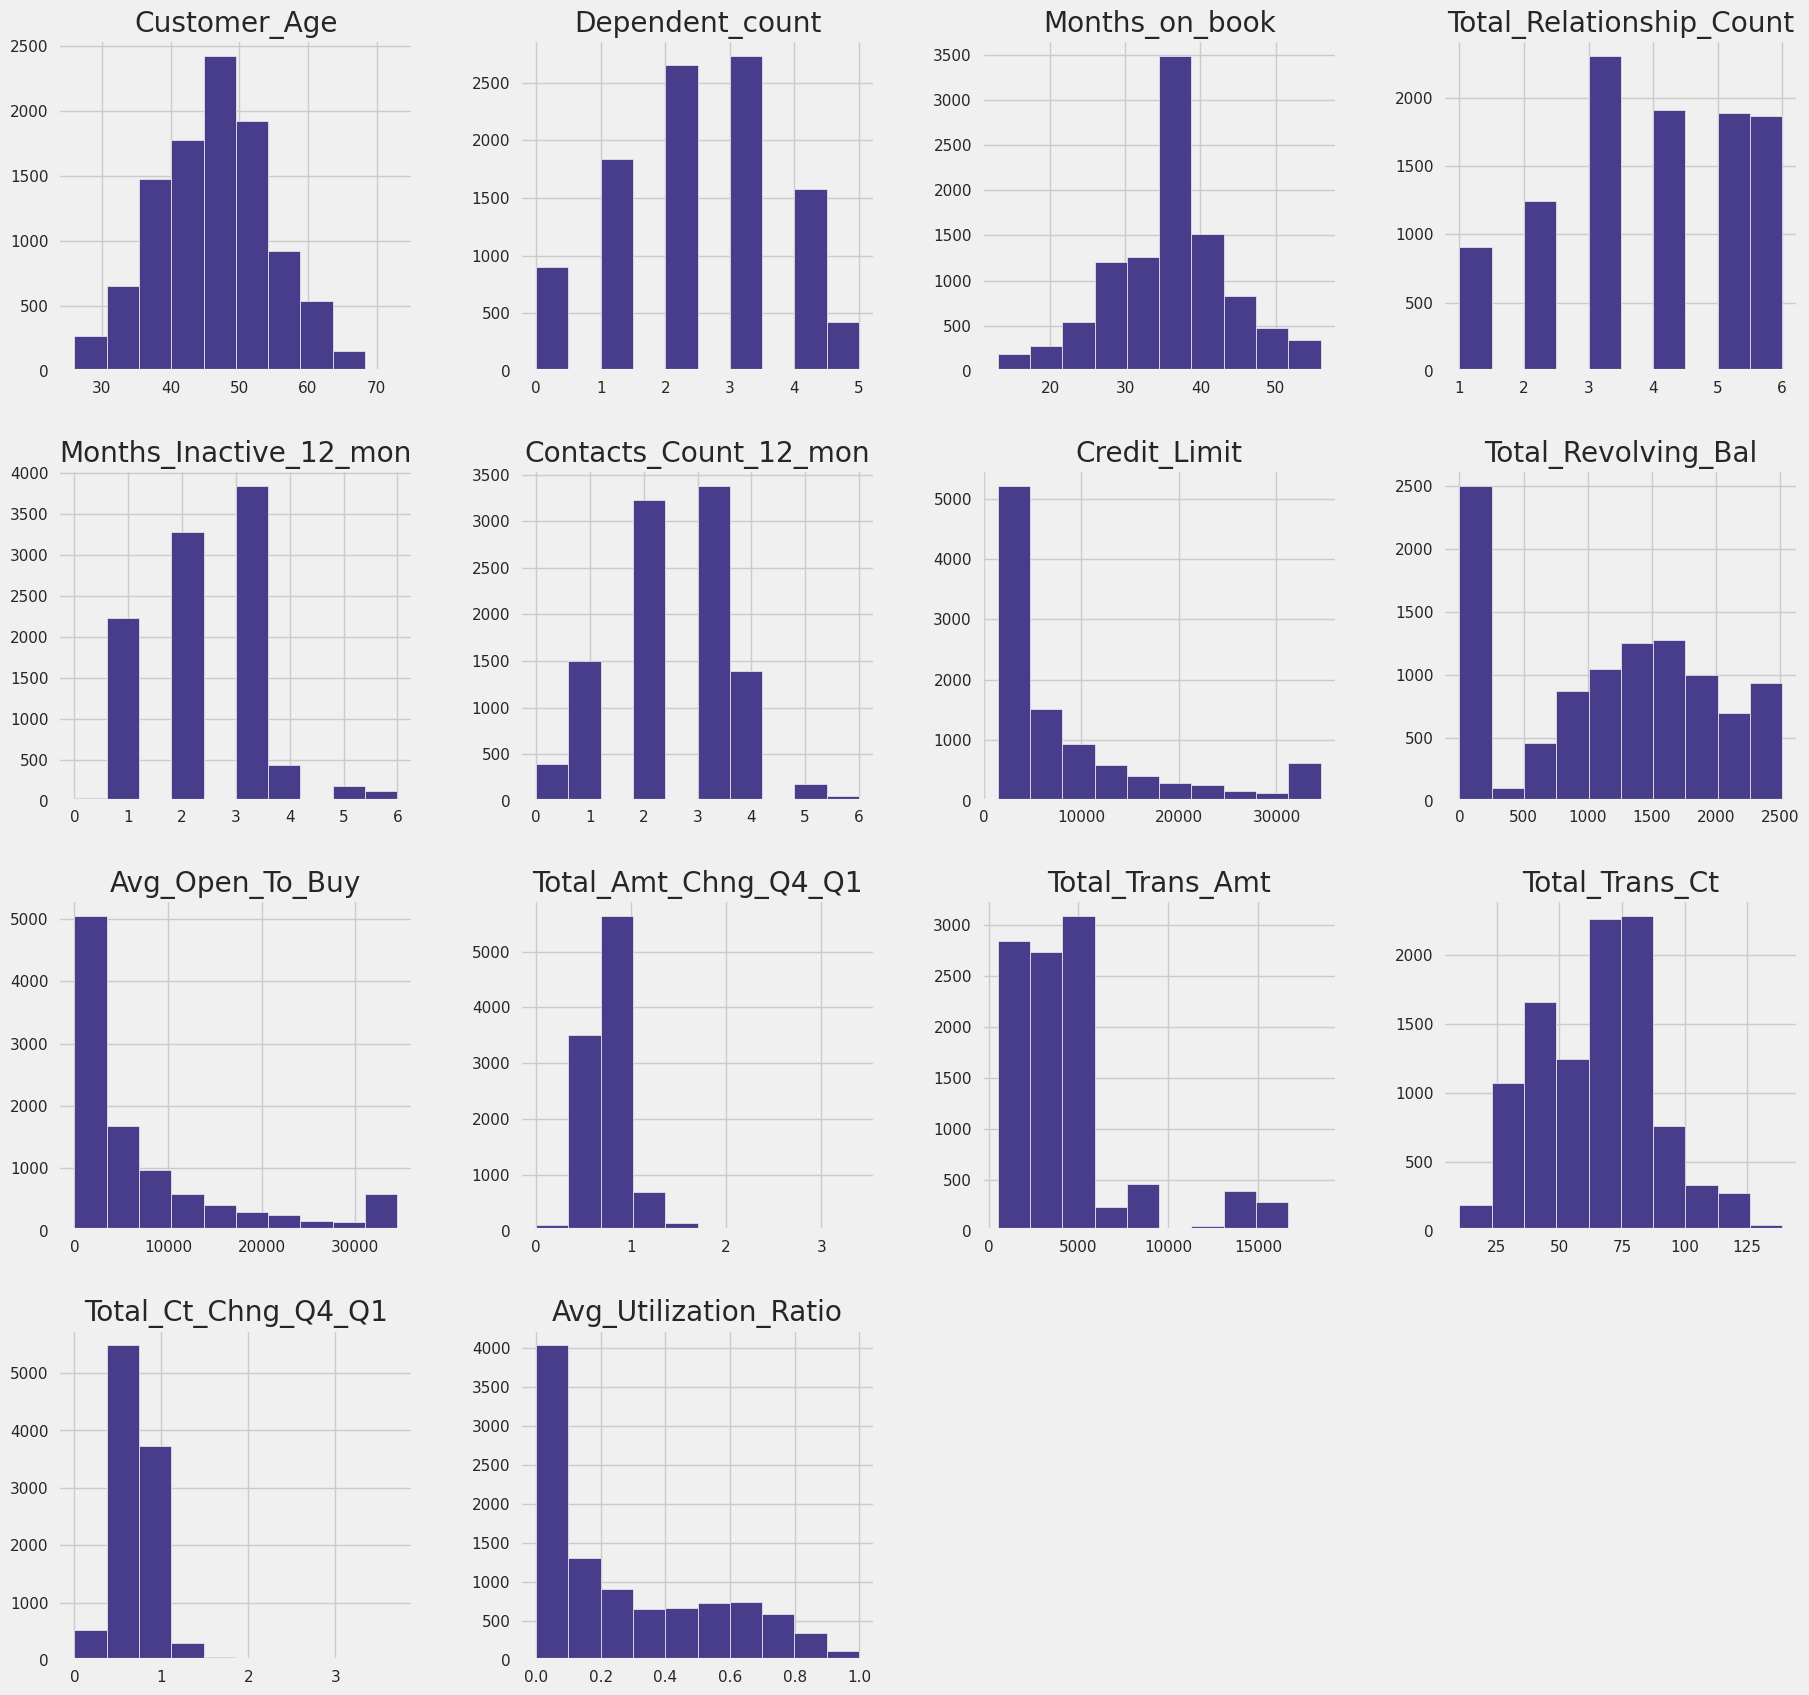

In [ ]:
hist_plot = df.hist(figsize = (20,20), color = "#483D8B")

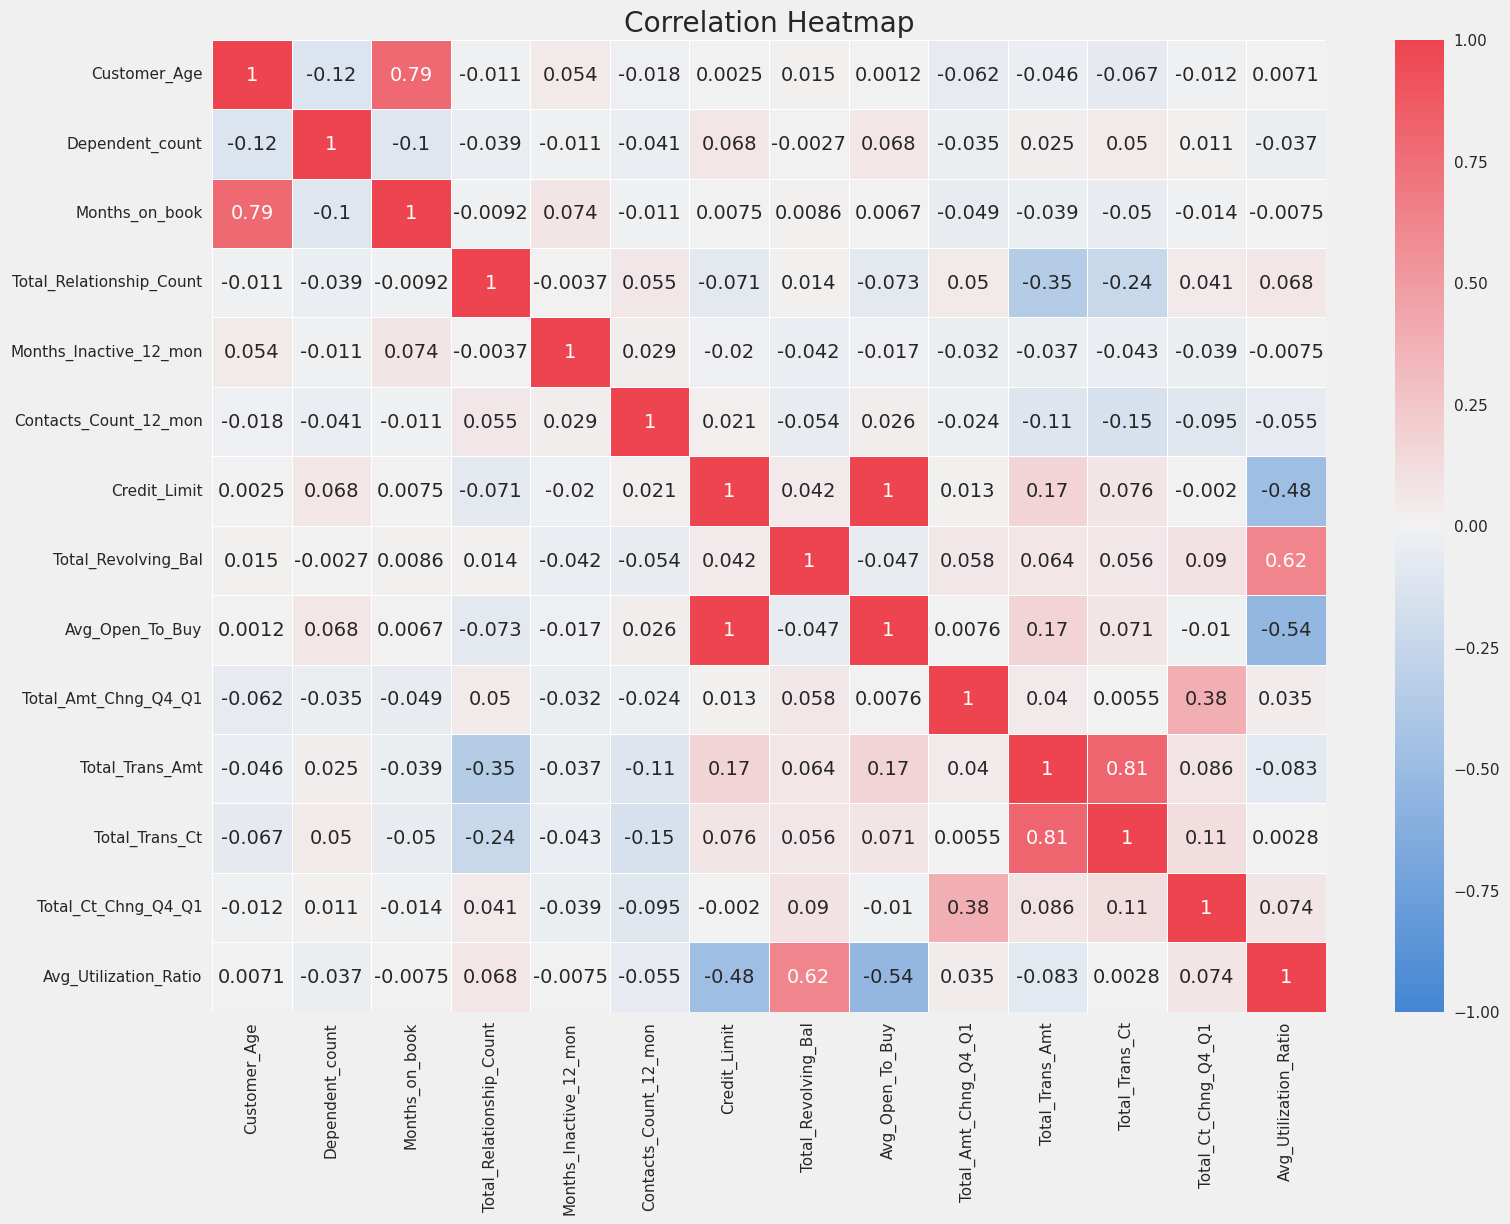

In [ ]:
#Correlation Matrix as a Heatmap

plt.figure(figsize = (16,12))
cmap = sns.diverging_palette(250, 10, l = 55, s = 80, n=9, as_cmap = True)
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Correlation Heatmap")

plt.show()


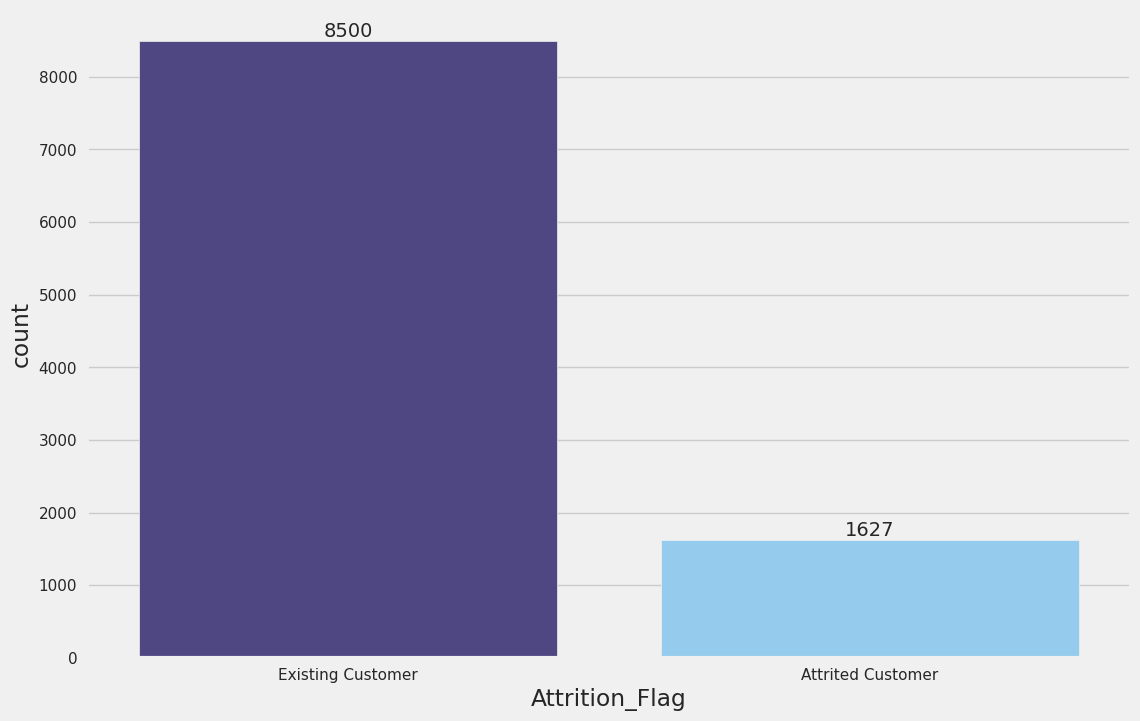

In [ ]:
colors=["#483D8B", "#87CEFA"]
ax = sns.countplot(data= df, x="Attrition_Flag", palette=colors)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# Scatterplot matrix (aka pairplot) - these can take some time to gerenerate if the number of features is large
#sns.set_theme(style="ticks")
#sns.color_palette("hls", 8)
#sns.pairplot(df, hue="Attrition_Flag",palette="light:m_r")

In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

# Preprocessing

In this process, the target “Attrition Flag” is encoded as 1 for “Attrite Customer”, and 0 for “Existing Customer”. We then conducted skewness correction to problematic features and limited their skewness within a safe range of [-1, 1]. To mitigate the influence of the extreme values, we use Turkey’s method to identify outliers and winsorized X to eliminate outliers.  After these steps, we split the dataset into training and testing data, and utilized SMOTE in training dataset and applied Scaling to both training and testing dataset of feature variables.

## Encoding

In [ ]:
# Defining independent and dependent attributes in training and test sets
X=df.drop(['Attrition_Flag'],axis=1)
y=df['Attrition_Flag']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
le = LabelEncoder()

# fit and transform the target variable
y_encoded = le.fit_transform(y)
y_encoded = 1 - y_encoded
print(y_encoded)


[0 0 0 ... 1 1 1]


In [ ]:
print(y)
print(X)

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object
       Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Unknown   
4                40      M                3      Uneducated        Married   
...             ...    ...              ...             ...            ...   
10122            50      M                2        Graduate         Single   
10123            41      M  

In [ ]:
# quant_features = ['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio',]
# categorical_features = ['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Gender_M','Education_Level_Doctorate','Education_Level_Graduate','Education_Level_High School','Education_Level_Post-Graduate',
#                         'Education_Level_Uneducated','Education_Level_Unknown','Marital_Status_Married','Marital_Status_Single','Marital_Status_Unknown','Income_Category_$40K - $60K','Income_Category_$60K - $80K',
#                         'Income_Category_$80K - $120K','Income_Category_Less than $40K','Income_Category_Unknown','Card_Category_Gold','Card_Category_Platinum','Card_Category_Silver']
# target = ['Attrition_Flag']


## Skewness Correction

In [ ]:
#Skewness correction
# Convert the categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Select columns to transform
cols_to_transform = ['Customer_Age', 'Total_Relationship_Count', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Shift data to make it positive
df[cols_to_transform] = df[cols_to_transform] - df[cols_to_transform].min() + 1

# Apply Box-Cox transformation
for col in cols_to_transform:
    df[col], _ = boxcox(df[col])

# Shift data back to original range
df[cols_to_transform] = df[cols_to_transform] - df[cols_to_transform].min() + 1

# Check skewness of transformed data
skewness = df[cols_to_transform].skew()

# Print skewness
print(skewness)


Customer_Age               -0.070829
Total_Relationship_Count   -0.180927
Credit_Limit               -0.076852
Total_Revolving_Bal        -0.860964
Avg_Open_To_Buy            -0.009411
Total_Amt_Chng_Q4_Q1       -0.088251
Total_Trans_Amt             0.015704
Total_Trans_Ct             -0.082693
Total_Ct_Chng_Q4_Q1        -0.067875
Avg_Utilization_Ratio       0.196942
dtype: float64


## Outlier

In [ ]:
# Tukey Rule outliers
cols = X.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X,i)

# Windsorize X and check the results
X = X.copy(deep=True)
for i in cols:
  X[i] = winsorize(X[i], limits=(0.05, 0.05))



# Split into training and testing



In [ ]:
# Split data into training and test data
X_train, X_test,y_train,y_test = train_test_split(X,y_encoded, test_size=0.2, random_state=0)
# Shape of X_train
X_train.shape

(8101, 32)

##SMOTE, Scaling

In [ ]:
# # SMOTE (Synthetic Minority Class Oversampling) of training data
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)
# Shape of X_train
X_train_SMOTE.shape
# y_train_SOMTE.shape


(13566, 32)

In [ ]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = StandardScaler()
X_train_SMOTE_std = s_scaler.fit_transform(X_train_SMOTE)
X_test_std = s_scaler.transform(X_test)
# X_train_std = pd.DataFrame(X_scaled, columns=col_names)
# X_train_std.describe().T

Data names after SOMTE and Scaling:

1) X_train_SMOTE_std

2) Y_train_SMOTE

3) X_test_std

4) y_test



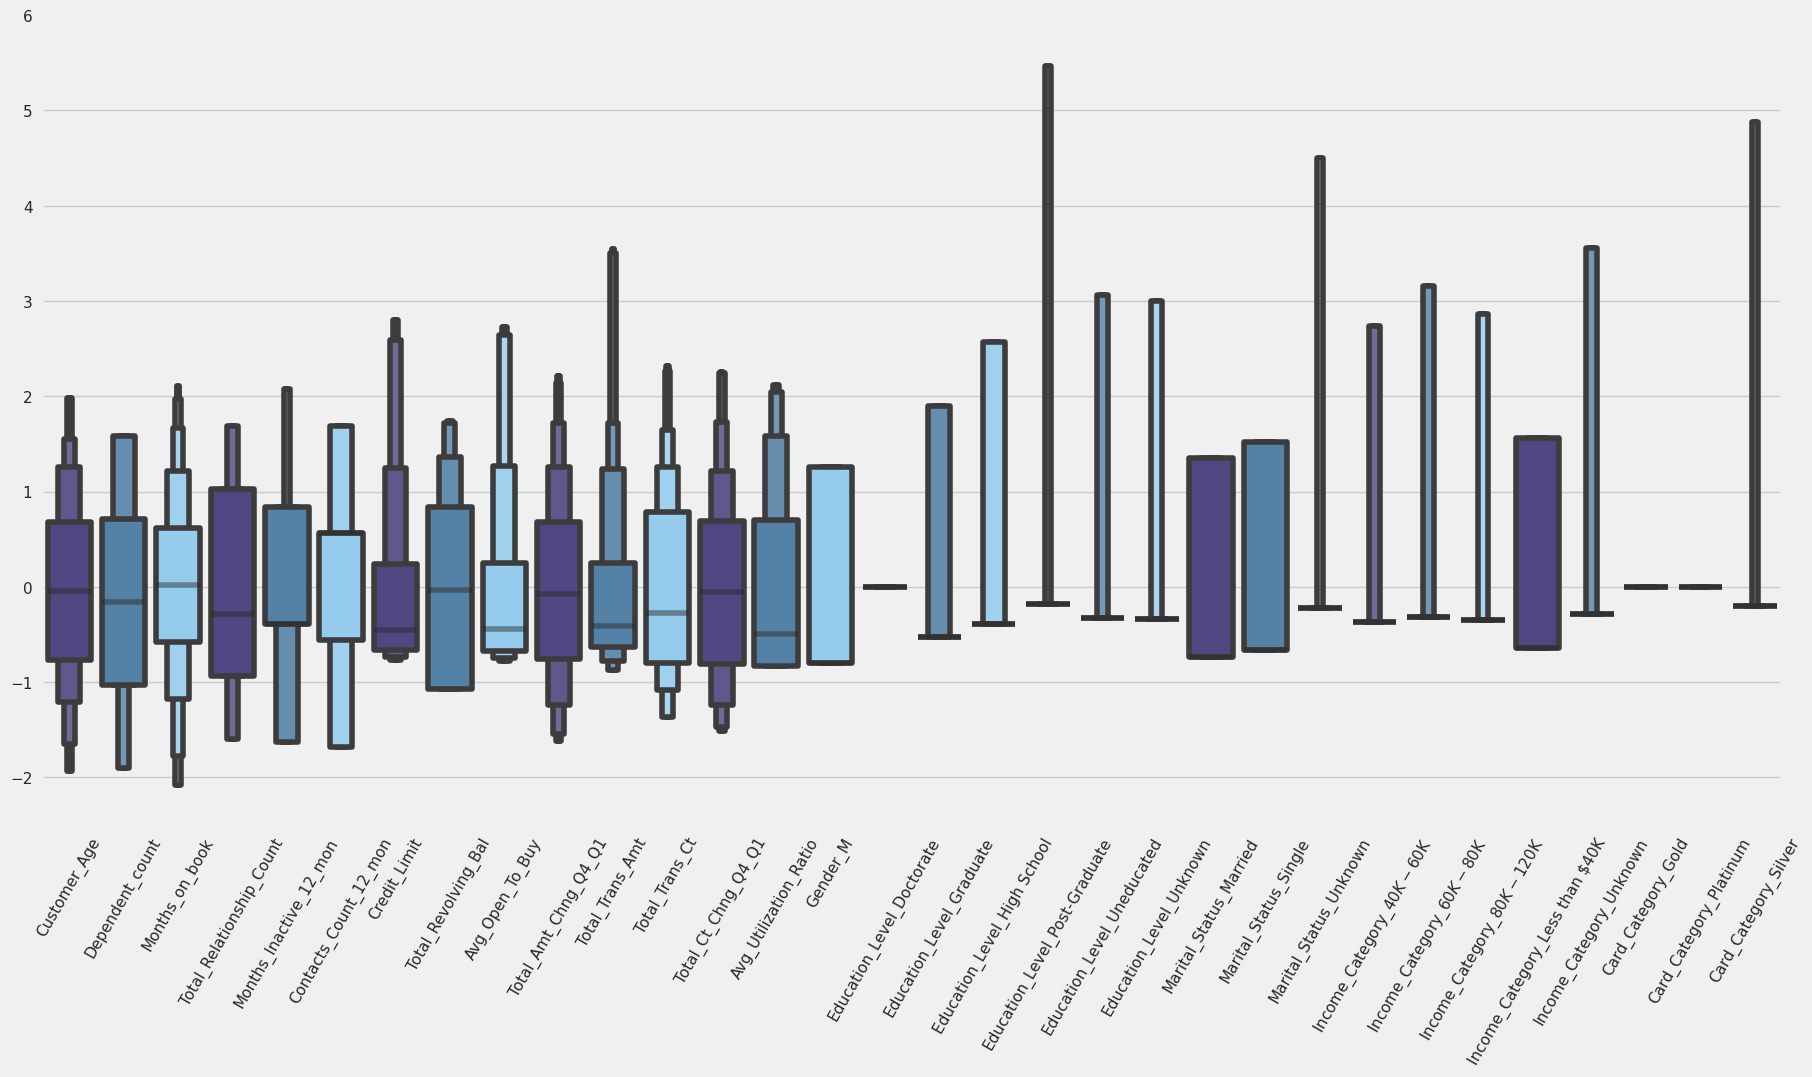

In [ ]:
#Plotting the scaled features using boxen plots
X_train_SMOTE_std_1 = pd.DataFrame(X_train_SMOTE_std)
X_train_SMOTE_std_1.columns = cols
colors=["#483D8B","#4682B4", "#87CEFA"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_train_SMOTE_std_1,palette = colors)
plt.ylim([-2.5, 6])
plt.xticks(rotation=60)
plt.show()

# Low-Code PyCaret code (on X,y)


In [ ]:
# Combine the predictor dataframe X and target dataframe y to get df1
df1 = pd.concat([X, y], axis=1)

# Initialize PyCaret
clf = setup(data=df1, target='Attrition_Flag')

# Compare multiple models and select the best one
best_model = compare_models(sort='AUC')

# Tune the model using a grid search
tuned_model = tune_model(best_model)

# Evaluate the performance of the tuned model
evaluate_model(tuned_model)

# Train the best model on the entire dataset
final_model = finalize_model(tuned_model)

# # Interpret final_model and plot the AUC curve
# plot_model(final_model, plot='auc')

,Description,Value
0,Session id,4162
1,Target,Attrition_Flag
2,Target type,Binary
3,Target mapping,"Attrited Customer: 0, Existing Customer: 1"
4,Original data shape,"(10127, 33)"
5,Transformed data shape,"(10127, 33)"
6,Transformed train set shape,"(7088, 33)"
7,Transformed test set shape,"(3039, 33)"
8,Numeric features,32
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9653,0.9916,0.9839,0.9750,0.9794,0.8687,0.8692,0.8970
xgboost,Extreme Gradient Boosting,0.9657,0.9907,0.9855,0.9739,0.9797,0.8694,0.8702,1.8950
gbc,Gradient Boosting Classifier,0.9605,0.9881,0.9859,0.9677,0.9767,0.8473,0.8490,2.1890
rf,Random Forest Classifier,0.9499,0.9846,0.9864,0.9555,0.9707,0.7997,0.8050,1.5220
ada,Ada Boost Classifier,0.9522,0.9809,0.9780,0.9655,0.9717,0.8175,0.8185,0.9570
et,Extra Trees Classifier,0.9271,0.9740,0.9879,0.9297,0.9579,0.6868,0.7056,1.4150
qda,Quadratic Discriminant Analysis,0.9010,0.9328,0.9647,0.9211,0.9424,0.5911,0.6006,0.2160
lda,Linear Discriminant Analysis,0.9048,0.9203,0.9602,0.9289,0.9442,0.6187,0.6238,0.4730
lr,Logistic Regression,0.8931,0.9116,0.9640,0.9134,0.9380,0.5502,0.5618,1.4310
knn,K Neighbors Classifier,0.8904,0.8826,0.9494,0.9223,0.9356,0.5667,0.5699,0.2730


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9577,0.9861,0.9832,0.9669,0.9750,0.8374,0.8387
1,0.9661,0.9894,0.9882,0.9719,0.9800,0.8700,0.8712
2,0.9591,0.9902,0.9798,0.9717,0.9757,0.8457,0.8460
3,0.9704,0.9936,0.9899,0.9752,0.9825,0.8866,0.8877
4,0.9661,0.9903,0.9849,0.9750,0.9799,0.8718,0.8723
5,0.9549,0.9792,0.9782,0.9684,0.9732,0.8291,0.8295
6,0.9661,0.9911,0.9782,0.9815,0.9798,0.8755,0.8755
7,0.9577,0.9879,0.9815,0.9685,0.9750,0.8386,0.8394
8,0.9633,0.9899,0.9933,0.9641,0.9785,0.8537,0.8581


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Fit PyCaret classifier on training data
pycaret_clf = tuned_model.fit(X_train, y_train)

# Predict target values for test data
y_hat = pycaret_clf.predict(X_test)
y_hat=pd.DataFrame(y_hat)
cm = confusion_matrix(y_test, y_hat)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy)

Confusion matrix
 [[1692   25]
 [  39  270]] 

Accuracy =  0.9684106614017769


In [ ]:
# Show tuned_model
tuned_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4162, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Starting from Logistic Regression classifier(on X_SMOTE_std,y_SMOTE)

In [ ]:
# Get started with logistic regression (logit) classifier
clm = LogisticRegression(random_state=1, solver='sag',max_iter=1000,class_weight='balanced')

clm.fit(X_train_SMOTE_std, np.ravel(y_train_SOMTE))            # Fit model using training data. Ravel converts a column vector into the required 1D array format.
y_pred = clm.predict(X_test_std)                                 # Apply model to test data
print('Logit: AUC = ', roc_auc_score(y_test,y_pred), ' recall =', recall_score(y_test, y_pred),' f1 = ', f1_score(y_test, y_pred))   # Test set accuracy
print(confusion_matrix(y_true=y_test,y_pred=y_pred))                           # Confusion matrix
print("Logit Model Coefficients",list(clm.coef_))                # Logistic coefficients (can be used to assess which variables have the largest effect size in the model)

Logit: AUC =  0.7913667437560433  recall = 0.6601941747572816  f1 =  0.631578947368421
[[1584  133]
 [ 105  204]]
Logit Model Coefficients [array([-0.12, -0.02, -0.09, -0.82,  0.49,  0.34,  1.05, -0.92, -1.15,
       -0.06,  1.73, -3.02, -0.62, -0.01, -0.97,  0.  , -0.75, -0.63,
       -0.27, -0.51, -0.5 , -1.1 , -0.73, -0.38, -0.99, -0.64, -0.51,
       -1.33, -0.89,  0.  ,  0.  ,  0.02])]


In [ ]:
# Get started with logistic regression (logit) classifier
lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
lgbm.fit(X_train_SMOTE_std, y_train_SMOTE)            # Fit model using training data. Ravel converts a column vector into the required 1D array format.
y_pred = lgbm.predict(X_test_std)                                 # Apply model to test data
print('Logit: AUC = ', roc_auc_score(y_test,y_pred), ' recall =', recall_score(y_test, y_pred),' f1 = ', f1_score(y_test, y_pred))   # Test set accuracy
print(confusion_matrix(y_true=y_test,y_pred=y_pred))                           # Confusion matrix

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Logit: AUC =  0.9468629901253974  recall = 0.9158576051779935  f1 =  0.8984126984126983
[[1679   38]
 [  26  283]]


<Axes: >

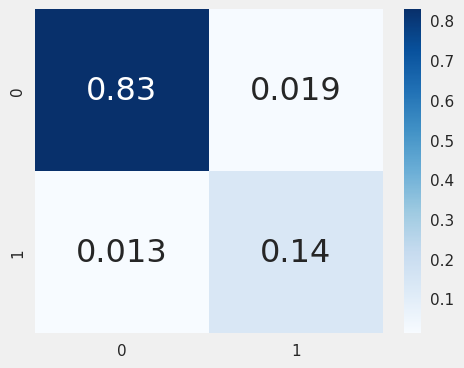

In [ ]:
plt.subplots(figsize=(5,4))
plt.xlabel('Confusion matrix')
cf_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=plt.cm.Blues,annot = True, annot_kws = {'size':23})

## Other classifier (on X,y - with Scale, SMOTE in pipeline)

In [ ]:
names = ["Perceptron", "Logistic Regression", "SVM (RBF kernel)", "Decision Tree", "Naive Bayes", "k Nearest Neighbors", "MLP", "Random Forest", "XG Boost", "Light GBM"]
classifiers = [
    Perceptron(random_state=1),
    LogisticRegression(),
    SVC(kernel="rbf", C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    KNeighborsClassifier(3),
    MLPClassifier(hidden_layer_sizes=(50,50),alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)]

# Build each classifier using the unbalanced TRAINING data, show decision region and petrformance of the unbalanced TEST data
no_folds = 5 # number of folds desired for cross validation
kf = StratifiedKFold(n_splits=no_folds, shuffle=True, random_state=12345)
for name, clf in zip(names, classifiers):
  print('CLASSIFIER: ',name,'\n')
  mean_accuracy = 0.0
  mean_auc = 0.0
  mean_f1 = 0.0
  mean_recall = 0.0
  for fold, (train_index, test_index) in enumerate(kf.split(X,y_encoded),1):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y_encoded[list(train_index)], y_encoded[list(test_index)]
    sm = SMOTE()
    X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
    stdsc = StandardScaler()
    X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)
    X_test_std = stdsc.transform(X_test)
    # pca = PCA()
    # X_train_pca=pca.fit_transform(X_train_SMOTE_std)
    # X_test_pca=pca.transform(X_test_std)
    clf.fit(X_train_SMOTE_std, y_train_SMOTE)
    y_pred = clf.predict(X_test_std)
    print(y_test)
    print(f'For fold {fold}:')
    print(f'Accuracy: {clf.score(X_test_std, y_test)}')
    print(f'AUC: {roc_auc_score(y_test, y_pred)}')
    print(f'F1: {f1_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    mean_accuracy = mean_accuracy + clf.score(X_test_std, y_test)
    mean_auc = mean_auc + roc_auc_score(y_test, y_pred)
    mean_f1 = mean_f1 + f1_score(y_test, y_pred)
    mean_recall = mean_recall + recall_score(y_test, y_pred)
  mean_accuracy = mean_accuracy / no_folds
  mean_auc = mean_auc / no_folds
  mean_f1 = mean_f1 / no_folds
  mean_recall = mean_recall / no_folds
  print('Average accuracy: %.3f Average AUC: %.3f Average F1: %.3f Average recall: %.3f\n\n' % (mean_accuracy, mean_auc, mean_f1, mean_recall))


CLASSIFIER:  Perceptron 

[0 0 0 ... 0 1 1]
For fold 1:
Accuracy: 0.8489634748272458
AUC: 0.7562865391555396
F1: 0.5690140845070423
Recall: 0.6196319018404908
[0 0 0 ... 1 1 0]
For fold 2:
Accuracy: 0.8632773938795657
AUC: 0.7487008300252616
F1: 0.5770992366412214
Recall: 0.5797546012269938
[0 0 0 ... 1 0 0]
For fold 3:
Accuracy: 0.8637037037037038
AUC: 0.7222171945701357
F1: 0.5475409836065575
Recall: 0.5138461538461538
[0 0 0 ... 1 1 1]
For fold 4:
Accuracy: 0.8409876543209877
AUC: 0.7547285067873303
F1: 0.558904109589041
Recall: 0.6276923076923077
[0 0 0 ... 0 0 1]
For fold 5:
Accuracy: 0.8508641975308642
AUC: 0.7344796380090497
F1: 0.5479041916167665
Recall: 0.563076923076923
Average accuracy: 0.854 Average AUC: 0.743 Average F1: 0.560 Average recall: 0.581


CLASSIFIER:  Logistic Regression 

[0 0 0 ... 0 1 1]
For fold 1:
Accuracy: 0.8830207305034551
AUC: 0.7864976542764345
F1: 0.639269406392694
Recall: 0.6441717791411042
[0 0 0 ... 1 1 0]
For fold 2:
Accuracy: 0.9022704837117473


## Learning Curve (on X)(AUC)

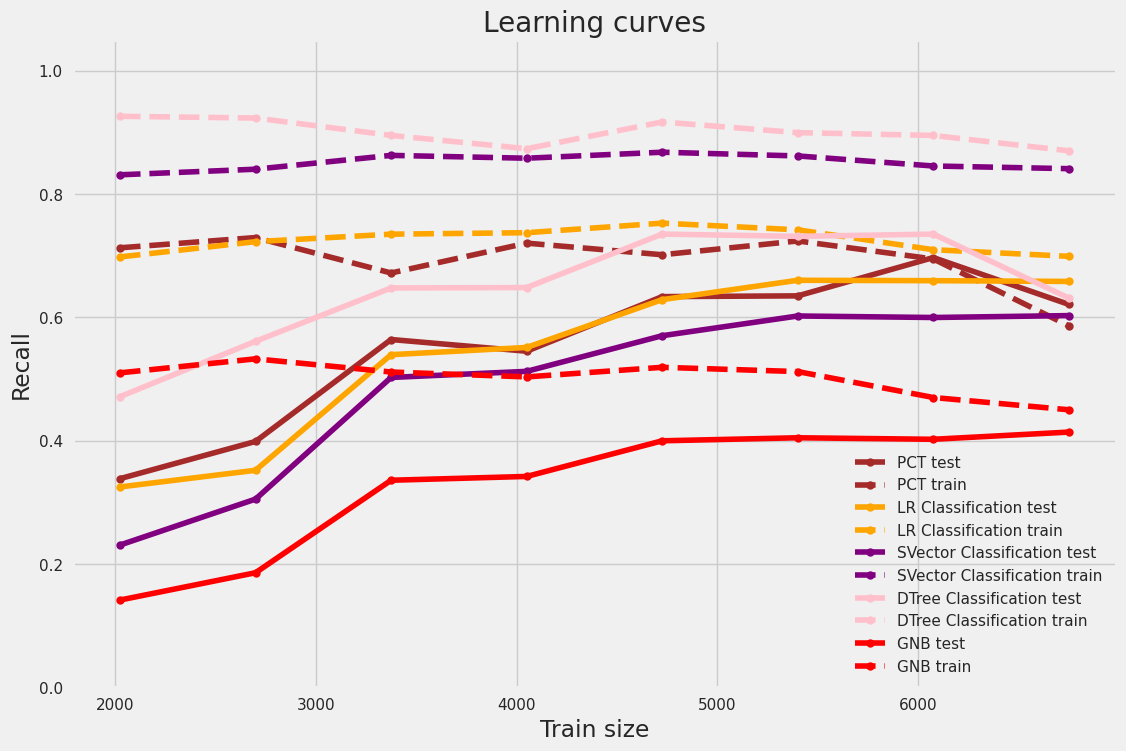

In [ ]:
train_sizes = 0.2 * len(X)

#可以在这里SMOTE

PCT = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', Perceptron(random_state=1))])

LR = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', LogisticRegression())])

SVector = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', SVC(kernel="rbf", C=1))])

DTree = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', DecisionTreeClassifier(max_depth=5))])

GNB = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', GaussianNB())])



# Visualize learning curves

train_sizes, train_scores_PCT, test_scores_PCT = learning_curve(
    PCT,
    X,
    np.ravel(y_encoded),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring='recall',
    cv=3,
)
train_sizes_MLP, train_scores_LR, test_scores_LR = learning_curve(
    LR,
    X,
    np.ravel(y_encoded),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring='recall',
    cv=3,
)
train_sizes, train_scores_SVector, test_scores_SVector = learning_curve(
    SVector,
    X,
    np.ravel(y_encoded),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring='recall',
    cv=3,
)
train_sizes, train_scores_DTree, test_scores_DTree = learning_curve(
    DTree,
    X,
    np.ravel(y_encoded),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring='recall',
    cv=3,
)

train_sizes, train_scores_GNB, test_scores_GNB = learning_curve(
    GNB,
    X,
    np.ravel(y_encoded),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring='recall',
    cv=3,
)


plt.rcParams["figure.figsize"] = (12,8)
plt.figure()
plt.plot(train_sizes, test_scores_PCT.mean(1), "o-", color="brown", label="PCT test")
plt.plot(train_sizes, train_scores_PCT.mean(1), "o--", color="brown", label="PCT train")
plt.plot(train_sizes, test_scores_LR.mean(1), "o-", color="orange", label="LR Classification test")
plt.plot(train_sizes, train_scores_LR.mean(1), "o--", color="orange", label="LR Classification train")
plt.plot(train_sizes, test_scores_SVector.mean(1), "o-", color="purple", label="SVector Classification test")
plt.plot(train_sizes, train_scores_SVector.mean(1), "o--", color="purple", label="SVector Classification train")
plt.plot(train_sizes, test_scores_DTree.mean(1), "o-", color="pink", label="DTree Classification test")
plt.plot(train_sizes, train_scores_DTree.mean(1), "o--", color="pink", label="DTree Classification train")
plt.plot(train_sizes, test_scores_GNB.mean(1), "o-", color="red", label="GNB test")
plt.plot(train_sizes, train_scores_GNB.mean(1), "o--", color="red", label="GNB train")

plt.xlabel("Train size")
plt.ylabel("Recall")
plt.ylim([0, 1.05])
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fractio

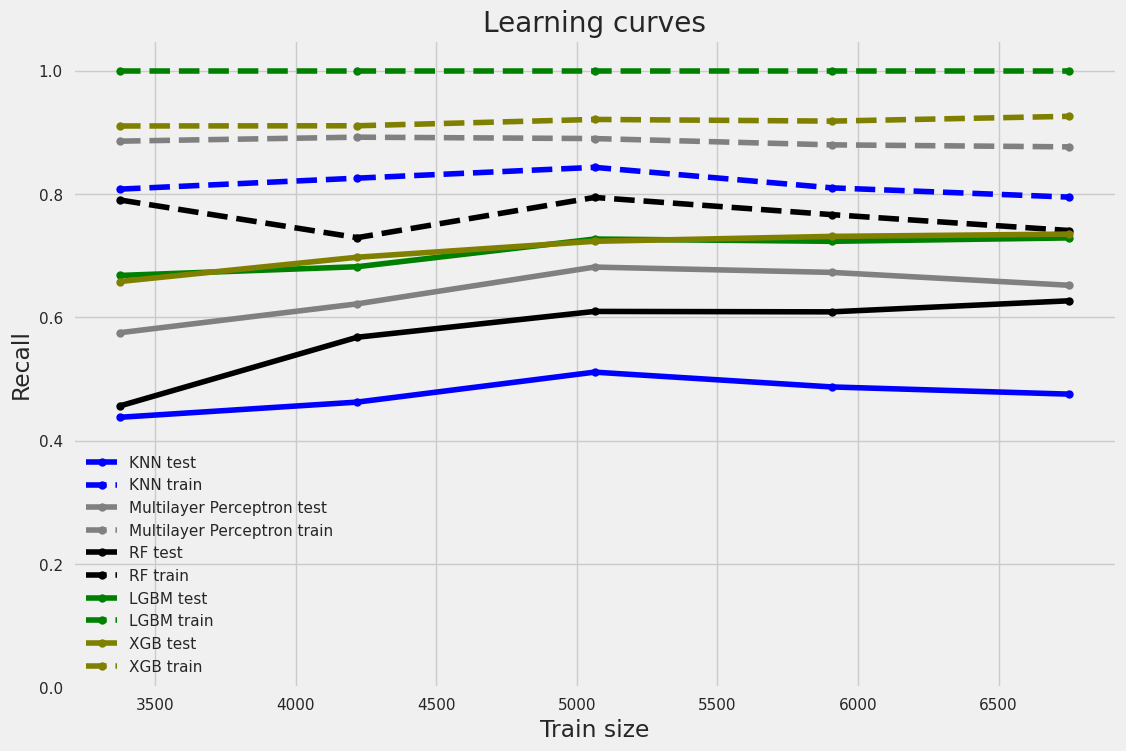

In [ ]:


kNN = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', KNeighborsClassifier(3))])

MLP = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', MLPClassifier(hidden_layer_sizes=(50,50),alpha=1, max_iter=1000))])

RF = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1))])

XGB = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3))])

LGBM = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2))])

train_sizes_kNN, train_scores_kNN, test_scores_kNN = learning_curve(
    kNN,
    X,
    y_encoded,
    train_sizes=np.linspace(0.5, 1.0, 5),
    scoring='recall',
    cv=3,
)
train_sizes_MLP, train_scores_MLP, test_scores_MLP = learning_curve(
    MLP,
    X,
    y_encoded,
    train_sizes=np.linspace(0.5, 1.0, 5),
    scoring='recall',
    cv=3,
)
train_sizes_RF, train_scores_RF, test_scores_RF = learning_curve(
    RF,
    X,
    y_encoded,
    train_sizes=np.linspace(0.5, 1.0, 5),
    scoring='recall',
    cv=3,
)
train_sizes_XGB, train_scores_XGB, test_scores_XGB = learning_curve(
    XGB,
    X,
    y_encoded,
    train_sizes=np.linspace(0.5, 1.0, 5),
    scoring='recall',
    cv=3,
)
train_sizes_LGBM, train_scores_LGBM, test_scores_LGBM = learning_curve(
    LGBM,
    X,
    y_encoded,
    train_sizes=np.linspace(0.5, 1.0, 5),
    scoring='recall',
    cv=3,
)
plt.rcParams["figure.figsize"] = (12,8)
plt.figure()
plt.plot(train_sizes_kNN, test_scores_kNN.mean(1), "o-", color="blue", label="KNN test")
plt.plot(train_sizes_kNN, train_scores_kNN.mean(1), "o--", color="blue", label="KNN train")
plt.plot(train_sizes_MLP, test_scores_MLP.mean(1), "o-", color="grey", label="Multilayer Perceptron test")
plt.plot(train_sizes_MLP, train_scores_MLP.mean(1), "o--", color="grey", label="Multilayer Perceptron train")
plt.plot(train_sizes_RF, test_scores_RF.mean(1), "o-", color="black", label="RF test")
plt.plot(train_sizes_RF, train_scores_RF.mean(1), "o--", color="black", label="RF train")
plt.plot(train_sizes_LGBM, test_scores_LGBM.mean(1), "o-", color="green", label="LGBM test")
plt.plot(train_sizes_LGBM, train_scores_LGBM.mean(1), "o--", color="green", label="LGBM train")
plt.plot(train_sizes_XGB, test_scores_XGB.mean(1), "o-", color="olive", label="XGB test")
plt.plot(train_sizes_XGB, train_scores_XGB.mean(1), "o--", color="olive", label="XGB train")
plt.xlabel("Train size")
plt.ylabel("Recall")
plt.ylim([0, 1.05])
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fractio

Test Mean:  [0.67 0.69 0.73 0.73 0.73]


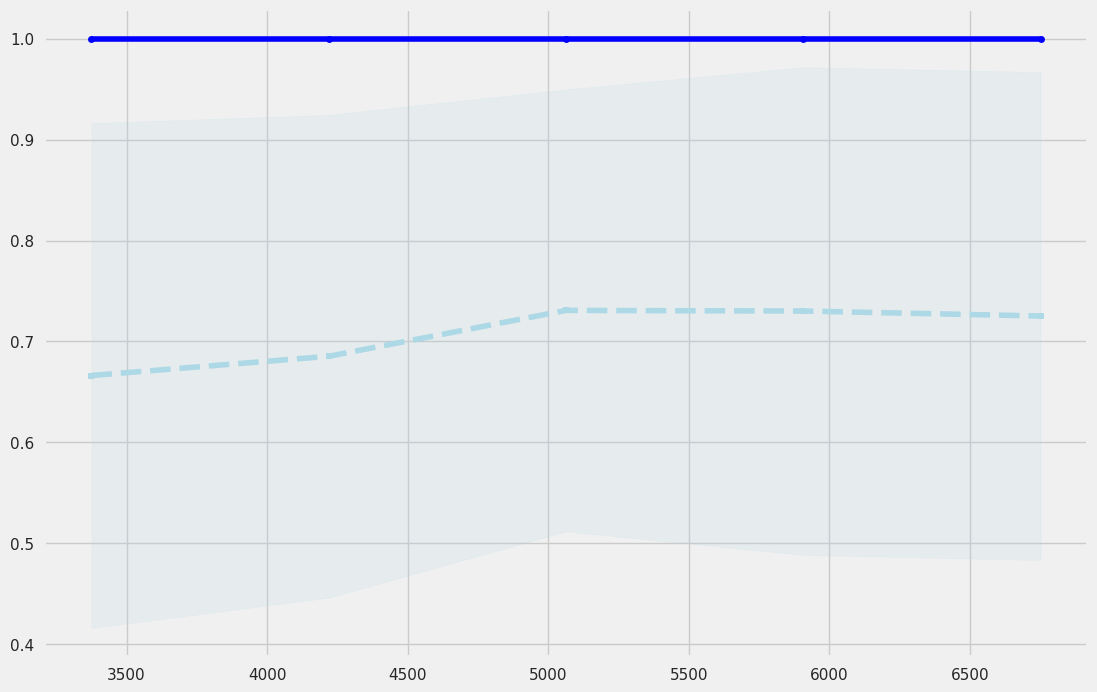

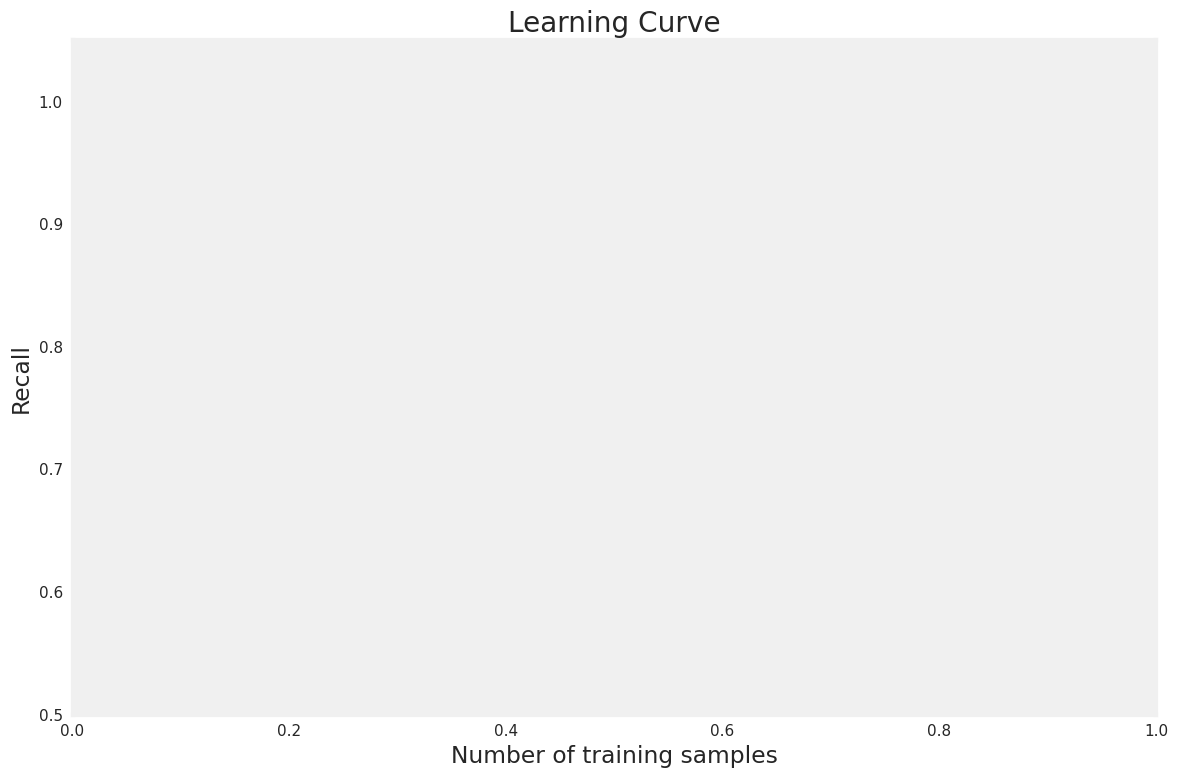

In [ ]:
model = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2))])

train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                               X=X,
                               y=y_encoded,
                               train_sizes=np.linspace(0.5, 1.0, 5),
                               scoring='recall',
                               cv=3,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


print('Test Mean: ',test_mean)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training recall')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='lightblue', linestyle='--',
         marker='s', markersize=5,
         label='validation recall')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='lightblue')

plt.figure(facecolor='white')  # 设置背景色为白色
plt.grid()  # 添加网格线
plt.xlabel('Number of training samples')
plt.ylabel('Recall')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()

plt.legend(loc='lower right')
plt.show()

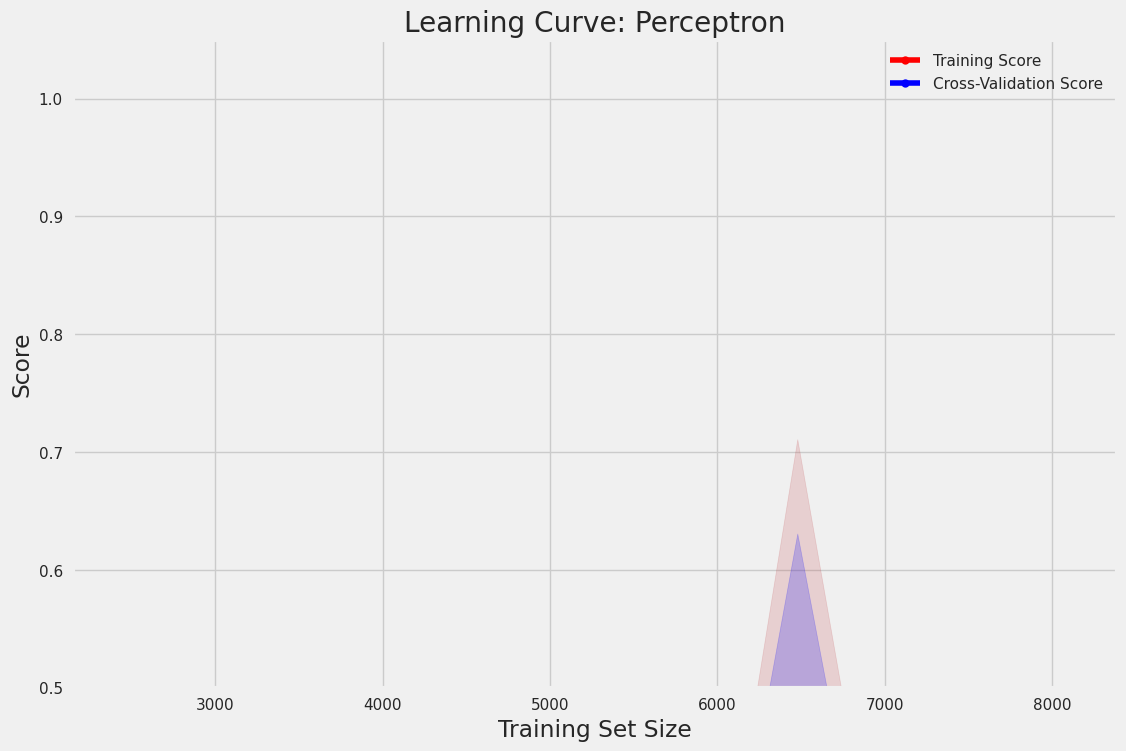

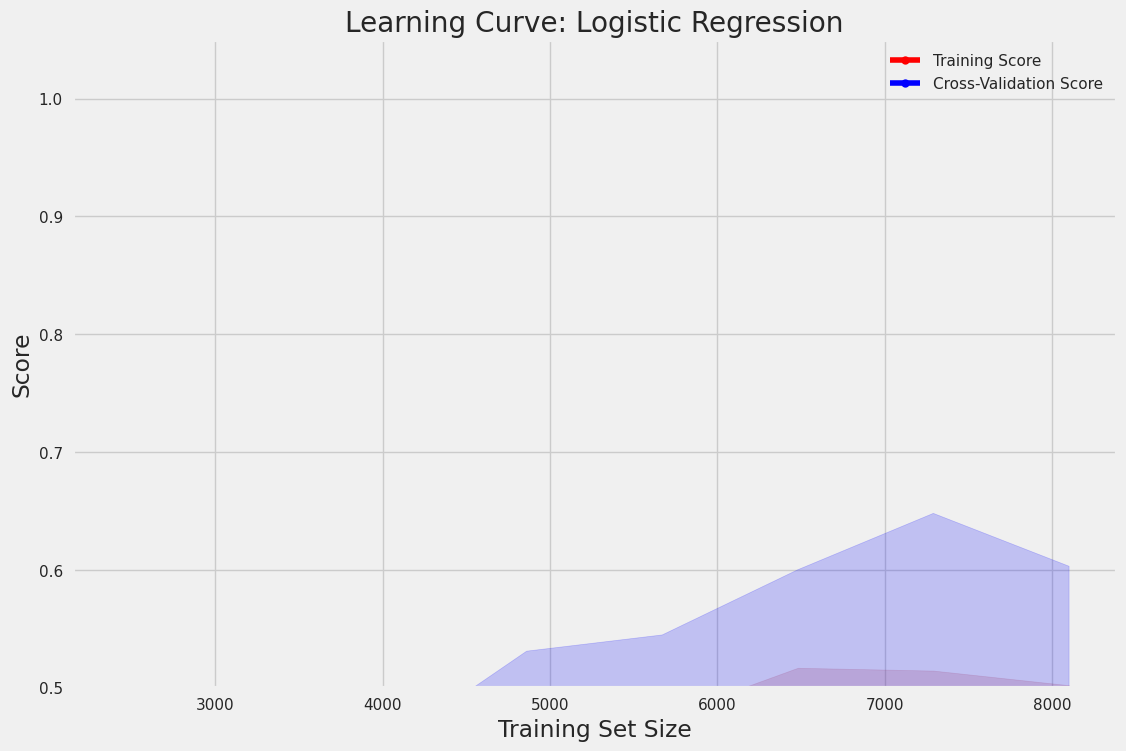

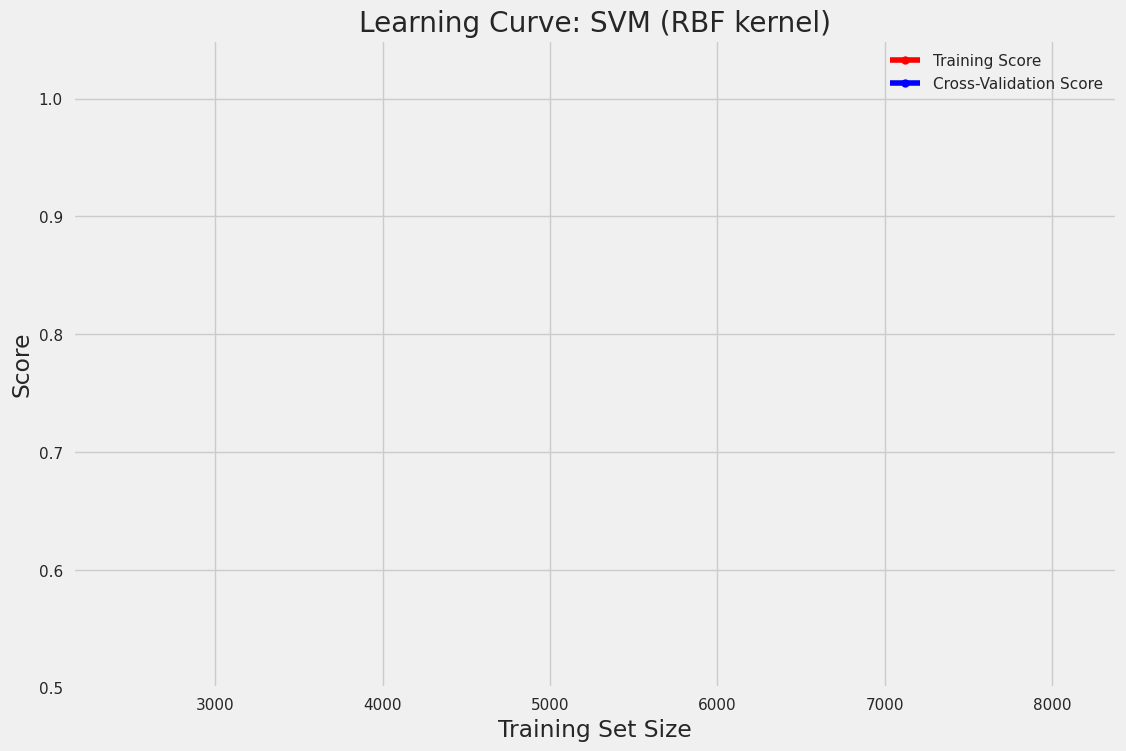

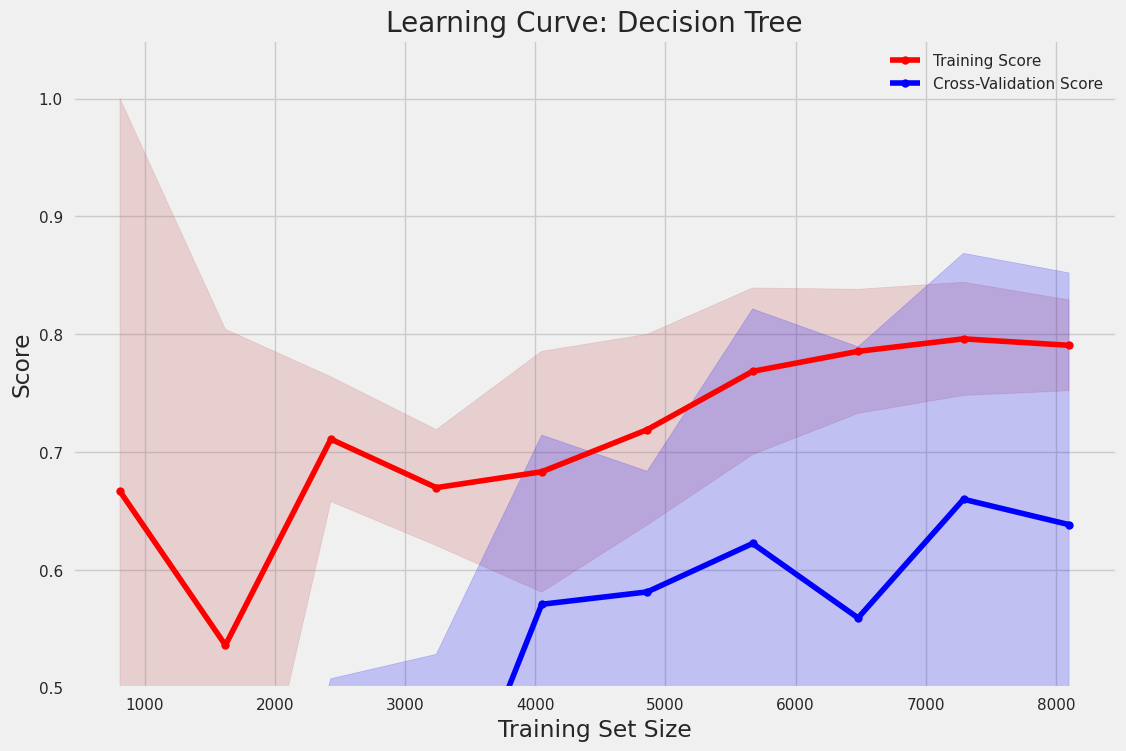

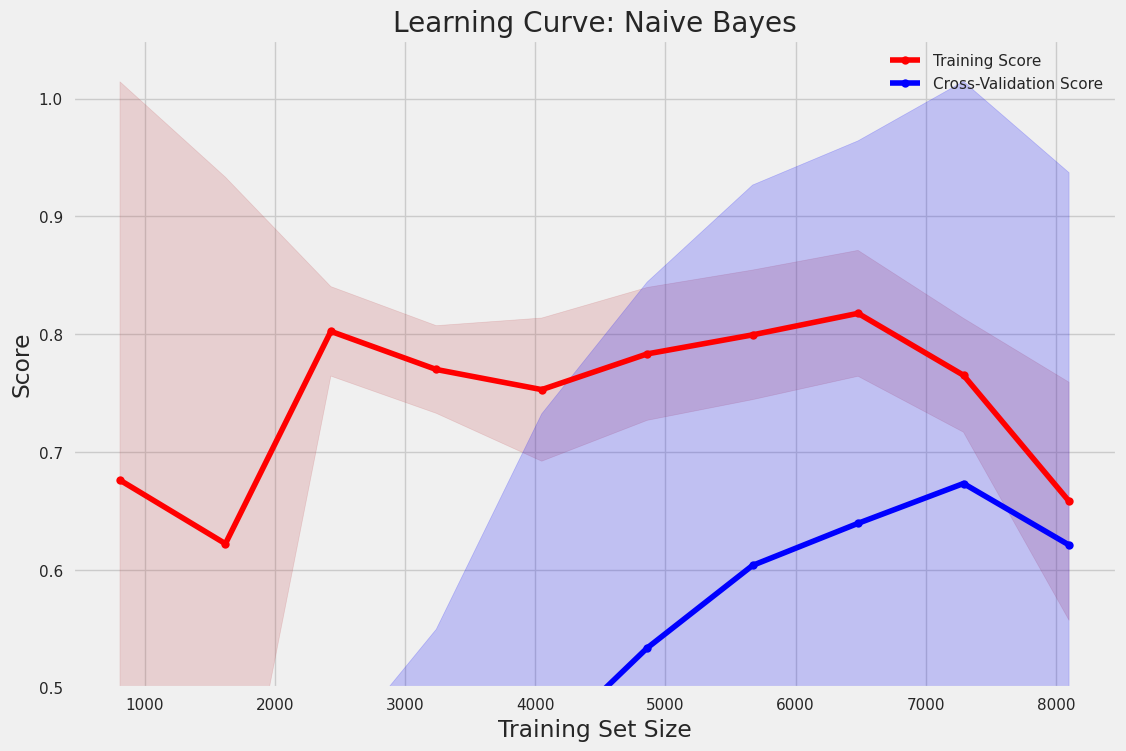

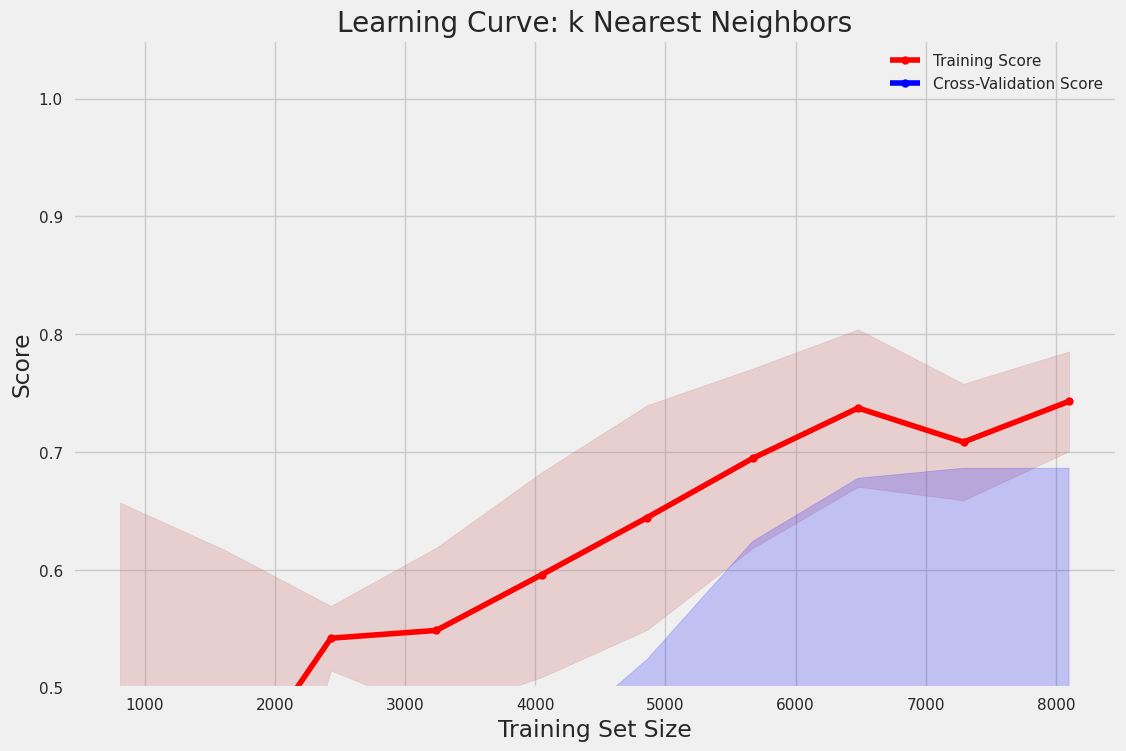

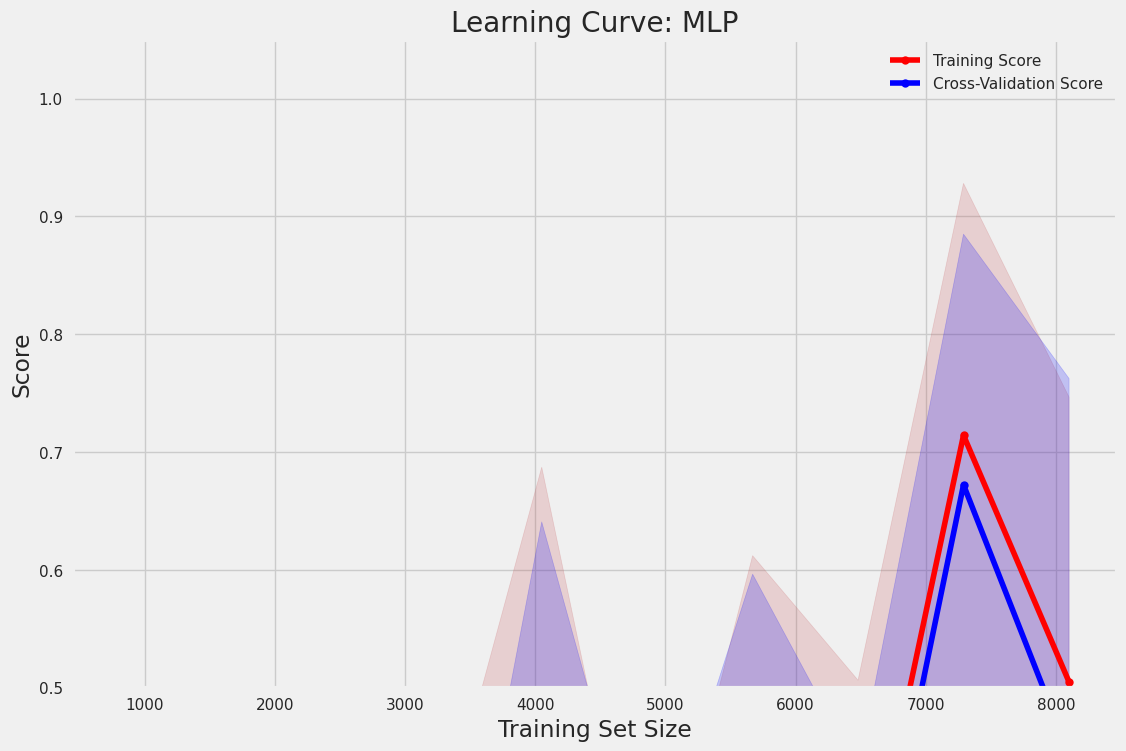

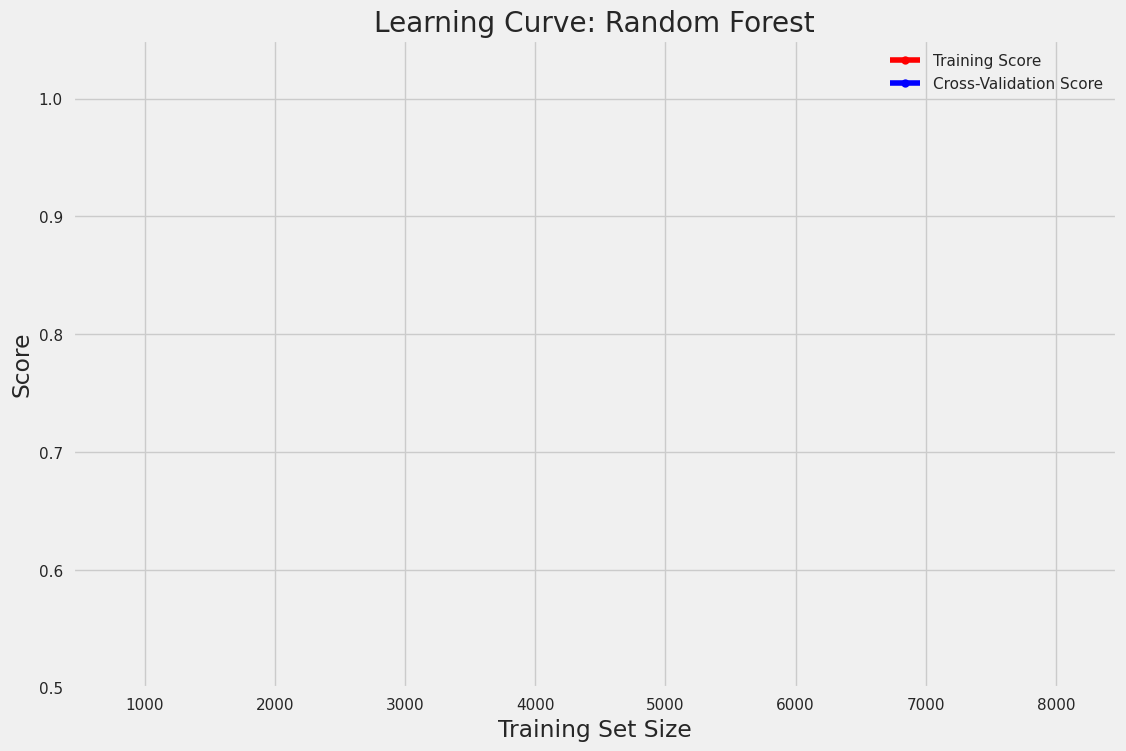

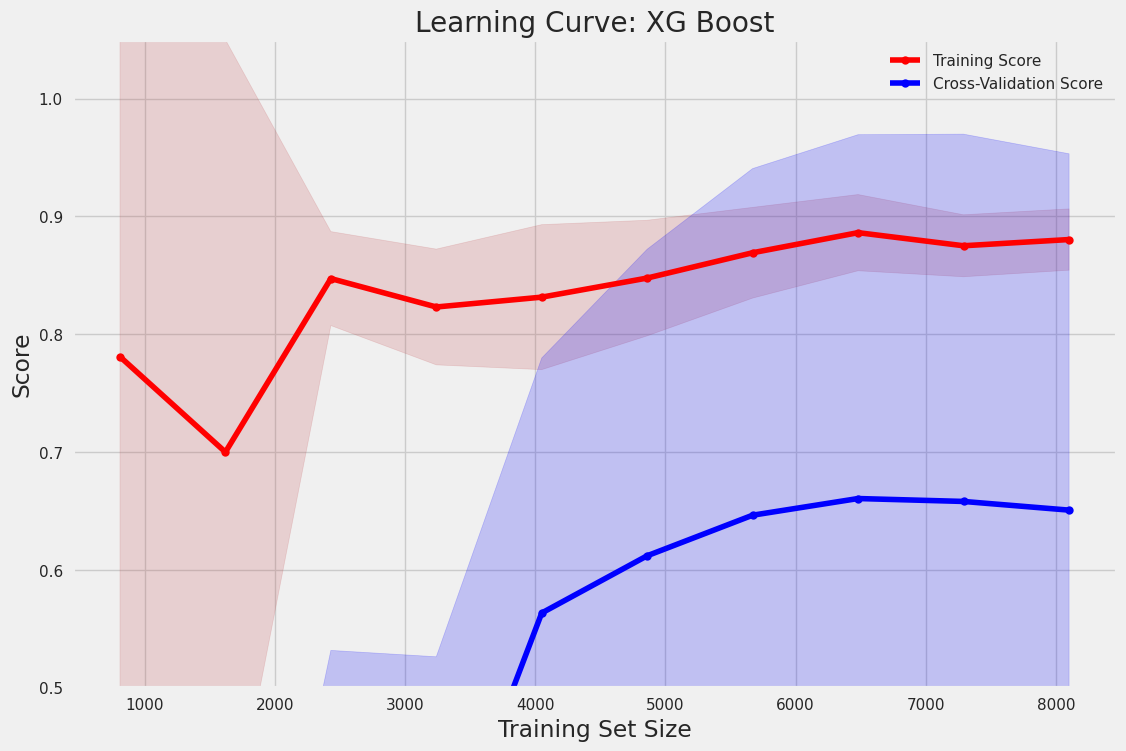

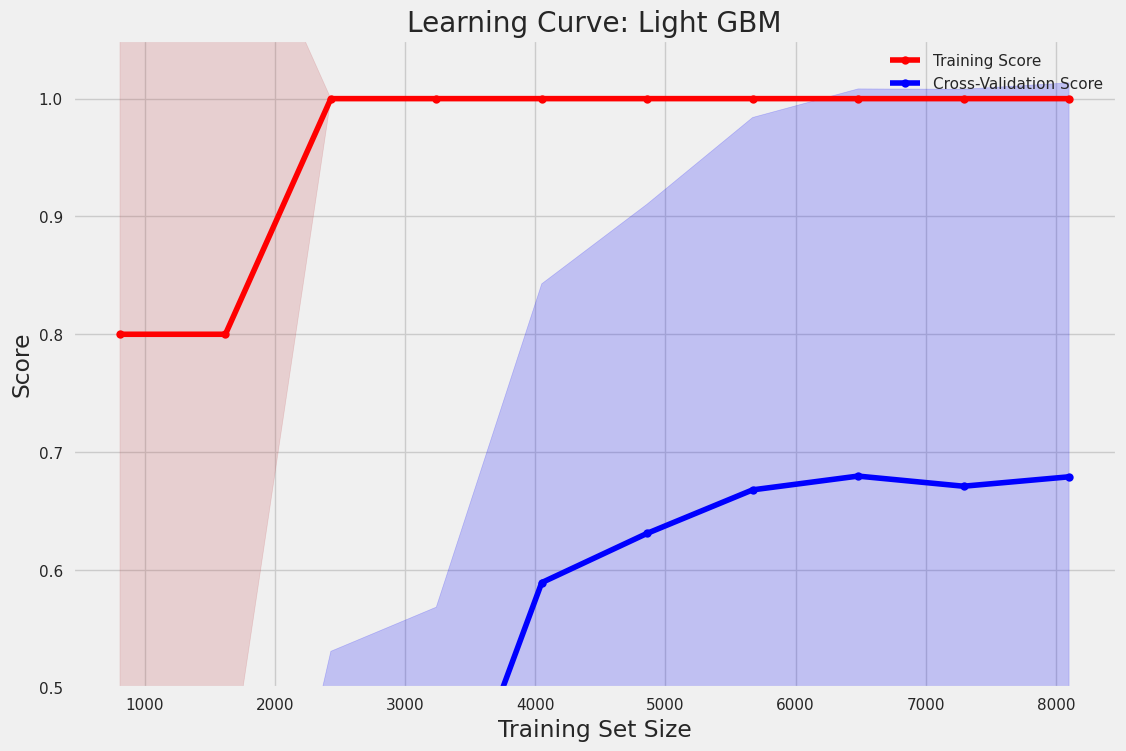

In [ ]:
# Define the classifiers and their names
classifier_names = ["Perceptron", "Logistic Regression", "SVM (RBF kernel)", "Decision Tree", "Naive Bayes", "k Nearest Neighbors", "MLP", "Random Forest", "XG Boost", "Light GBM"]
classifiers = [
    Perceptron(random_state=1),
    LogisticRegression(),
    SVC(kernel="rbf", C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    KNeighborsClassifier(3),
    MLPClassifier(hidden_layer_sizes=(50,50),alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)]

# Create an array of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Perform learning curve evaluation for each classifier
for clf, name in zip(classifiers, classifier_names):
    train_sizes_abs, train_scores, test_scores = learning_curve(
        clf, X, y_encoded, cv=5, train_sizes=train_sizes, scoring='recall', n_jobs=-1
    )

    # Calculate the mean and standard deviation of the training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure()
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    plt.ylim([0.5, 1.05])
    plt.fill_between(
        train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
        alpha=0.2, color="r"
    )
    plt.fill_between(
        train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
        alpha=0.2, color="blue"
    )
    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="red", label="Training Score")
    plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="blue", label="Cross-Validation Score")
    plt.legend(loc="best")

    plt.show()


## PCA of LGBM

Following the selection of the Light GBM classifier, we performed PCA (Principal Component Analysis) to reduce the dimensionality of the dataset and improve computational efficiency. The percentage of instances with propensities is computed in [0.7,0.3]. Graph5 shows an improved performance in the confusion matrix. The increasing proportion of false negatives and false positives indicating a reduced number of these 2 terms (of only 37 and 38), indicating a high a recall of 0.867 and a F1 score of 0.831.

To tune the hyper parameters of Light GBM, we use cross validation of 5 folds. The grid search process identified the following optimal hyperparameters: {'bagging_fraction': 0.7, 'feature_fraction': 0.7, 'learning_rate': 0.15, 'num_leaves': 70, 'reg_lambda': 0.1}. The best score achieved through grid search of 0.679 showcasing the robustness and effectiveness of the tuned LightGBM model.

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Percentage of test instances with propensity in [0.30, 0.70]: 3.36
Logit: AUC =  0.9337330316742082  recall = 0.8892307692307693  F1  0.8878648233486943
[[1663   37]
 [  36  289]]
Accuracy =  0.9639506172839506
Recall =  0.8892307692307693
F1 =  0.8878648233486943
Instances for which actual and predicted differ:


,Actual,Predicted,Propensity
20,0,1,0.960187
50,0,1,0.592954
52,0,1,0.931645
53,0,1,0.995689
58,0,1,0.620280
...,...,...,...
1893,1,0,0.400618
1897,1,0,0.452776
1911,1,0,0.051439
1975,1,0,0.366455


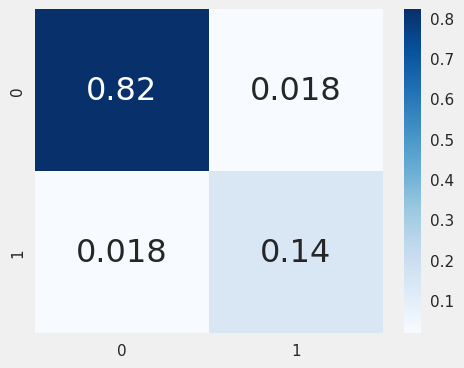

In [ ]:
# Review propensities and misclassifications from PCA solution
clf =  LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
clf_propensities = pd.DataFrame(clf.fit(X_train_SMOTE_std, np.ravel(y_train_SMOTE)).predict_proba(X_test_std))

# Create a dataframe showing actuals, predicted, and propensities
y_pred = pd.DataFrame(y_pred)
y_pred.reset_index(drop = True , inplace = True)
y_test = pd.DataFrame(y_test)
y_test.reset_index(drop = True , inplace = True)
results = pd.concat([y_test, y_pred, clf_propensities[1]], axis=1)
results.columns= ['Actual','Predicted','Propensity']

#Compute percentage of instances with propensities in [lower_limit,upper_limit]
upper_limit = 0.7
lower_limit = 0.3
count = 0
for i in range(0,len(clf_propensities[1])):
  if((clf_propensities.loc[i,1] >= lower_limit) & (clf_propensities.loc[i,1] <= upper_limit)):
    count = count + 1
print('Percentage of test instances with propensity in [%1.2f, %1.2f]: %3.2f' % (lower_limit,upper_limit,100 * count/len(clf_propensities[1])))



print('Logit: AUC = ', roc_auc_score(y_test,y_pred), ' recall =', recall_score(y_test, y_pred),' F1 ', f1_score(y_test, y_pred))   # Test set accuracy


# Reporting
print(confusion_matrix(y_test, y_pred))
print("Accuracy = ",accuracy_score(y_test, y_pred))
print("Recall = ",recall_score(y_test, y_pred))
print("F1 = ",f1_score(y_test, y_pred))
plt.subplots(figsize=(5,4))
plt.xlabel('Confusion matrix')
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=plt.cm.Blues,annot = True, annot_kws = {'size':23})

# Show instances where predicted and actual differ
print('Instances for which actual and predicted differ:')
discrepancies = results.loc[results['Actual'] != results['Predicted']]
discrepancies

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select the classifier for grid search
classifier = LGBMClassifier(boosting_type='gbdt', objective='binary')
# LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)

# Define the hyperparameters to tune
param_grid = {
    'num_leaves': [50, 70],
    'learning_rate': [0.1, 0.15],
    'bagging_fraction': [0.7,0.9],
    'feature_fraction': [0.7,0.9],
    'reg_lambda': [0.1, 0.2]
}

# Perform grid search
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='recall')
grid_search.fit(X, y_encoded)

# Get the best model and its hyperparameters
best_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and score
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fractio

1.
'bagging_fraction': 0.7, 'feature_fraction': 0.7, 'learning_rate': 0.15, 'num_leaves': 70, 'reg_lambda': 0.1
Best Score: 0.679639452571968

2.
param_grid = {
    'num_leaves': [50, 70],
    'learning_rate': [0.1, 0.15],
    'bagging_fraction': [0.7,0.6],
    'feature_fraction': [0.7,0.6],
    'reg_lambda': [0.1, 0.2]
}

Best Hyperparameters: {'bagging_fraction': 0.7, 'feature_fraction': 0.7, 'learning_rate': 0.15, 'num_leaves': 70, 'reg_lambda': 0.1}
Best Score: 0.679639452571968

In [ ]:
#LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=70, learning_rate=0.15, bagging_fraction=0.7, feature_fraction=0.7, reg_lambda=0.1)

# Feature Importance
Both LGBM’s feature importance and Sharpley value tell similar stories, in two graphs we can see the first six features with high importance in common. Both methods indicate that, among all the 23 features, Total Transaction Amount and Total Transaction Count are 2 most significant driver of credit card churn.

As can be shown in Univariate Partial Dependence Plot , other variables such as Change in Transaction Count (Q4 over Q1), Change in Transaction Amount (Q4 over Q1), Total Revolving Balance on the Credit Card, Total Number of Products Customer Held are also important, with churn rate decreasing, respectively increasing with these features.




## RFE

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
_ = rfe.fit(X,y_encoded)
print('Important Features\n',X.columns[rfe.support_])
rf = RandomForestClassifier()
_ = rf.fit(rfe.transform(X), y_encoded)
print("\n Accuracy: ",rf.score(rfe.transform(X), y_encoded))

Important Features
 Index(['Customer_Age', 'Total_Relationship_Count', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

 Accuracy:  1.0


## Permutation importance

In [ ]:
# plt.rcParams["figure.figsize"] = (10,8)
# perm_importance = permutation_importance(clf, X_SMOTE_std, y_SMOTE)
# sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(cols[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")

In [ ]:
# X_SMOTE_std.columns = cols

## Feature importance in LGBM


Text(0.5, 0, 'LGBM Model Feature Importance')

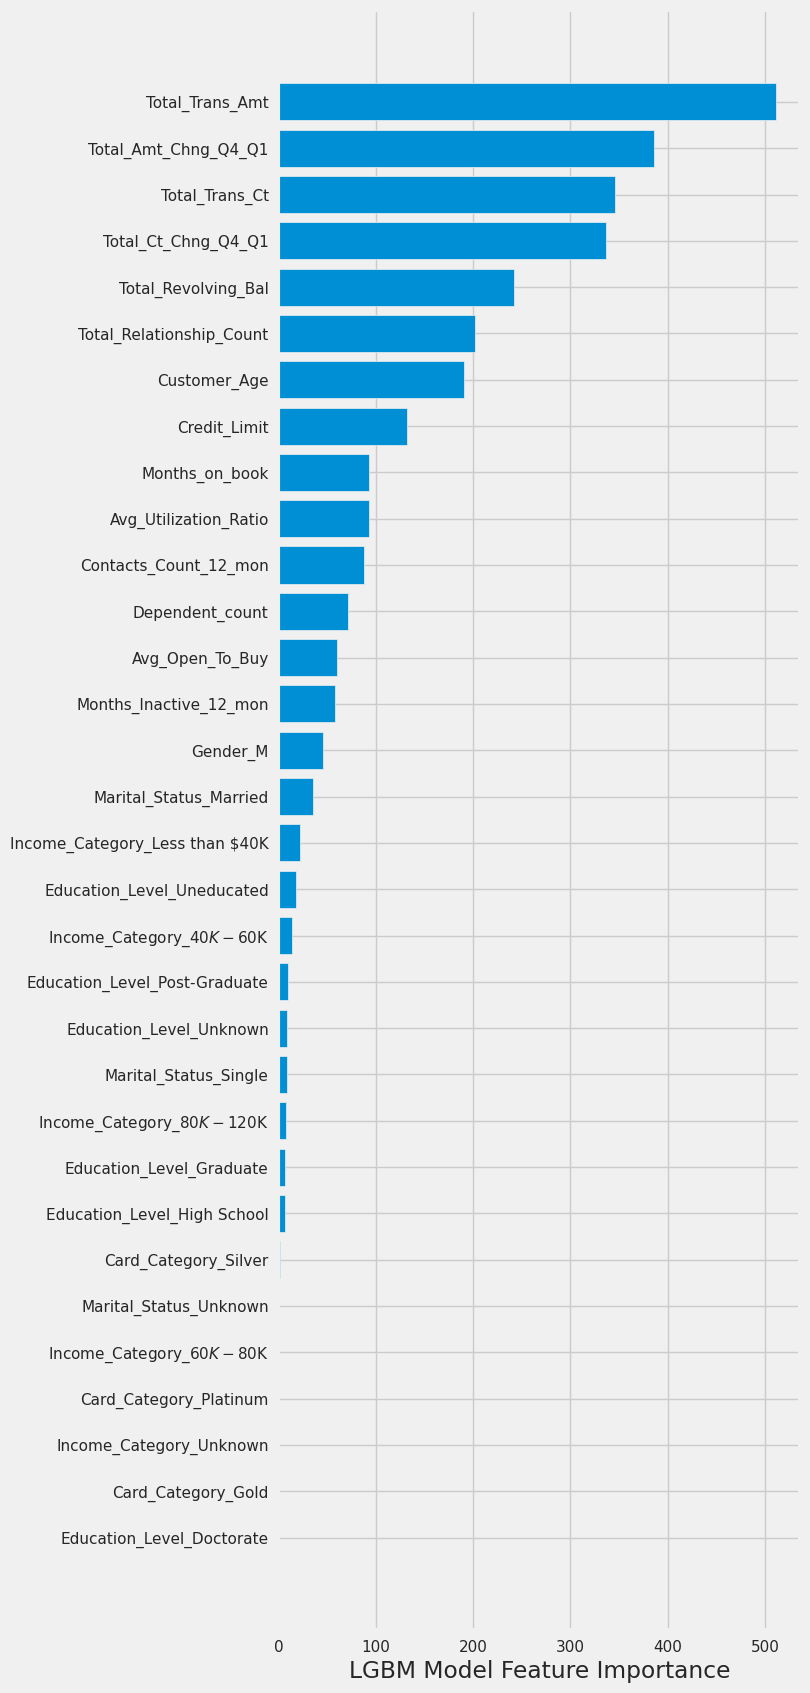

In [ ]:
# Fit LGBM model, recover feature importances
lgbm=LGBMClassifier()
lgbm.fit(X_test_std,np.ravel(y_pred))
sorted_idx = lgbm.feature_importances_.argsort()
sort_cols = [cols[i] for i in sorted_idx]
fig = plt.figure(figsize=(6,20))
plt.barh(sort_cols, lgbm.feature_importances_[sorted_idx])
plt.xlabel("LGBM Model Feature Importance")

## Sharpley Value

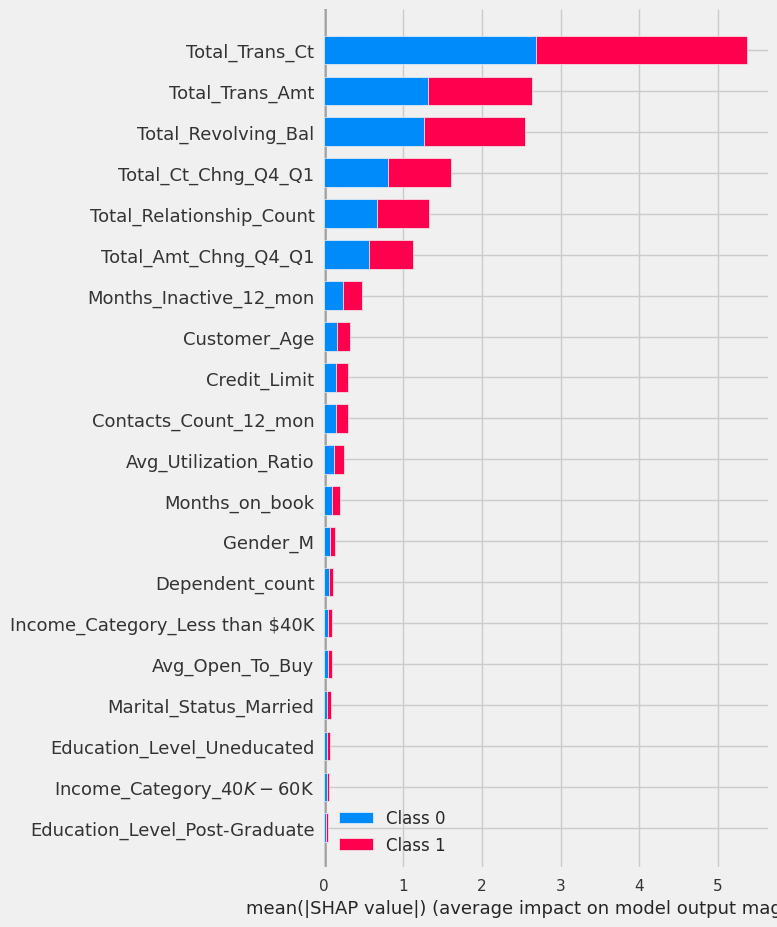

In [ ]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test_std)
shap.summary_plot(shap_values, X_test_std, plot_type='bar',feature_names=cols)

## PDPs

In [ ]:
cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [ ]:
print(X_test_std.shape)

(2025, 32)


In [ ]:
#Column names
X_test_std = pd.DataFrame(X_test_std)

X_test_std.columns = cols
y_test = pd.DataFrame(y_test)
y_test.columns = ['target']
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['predictions']


<Figure size 2000x2000 with 0 Axes>

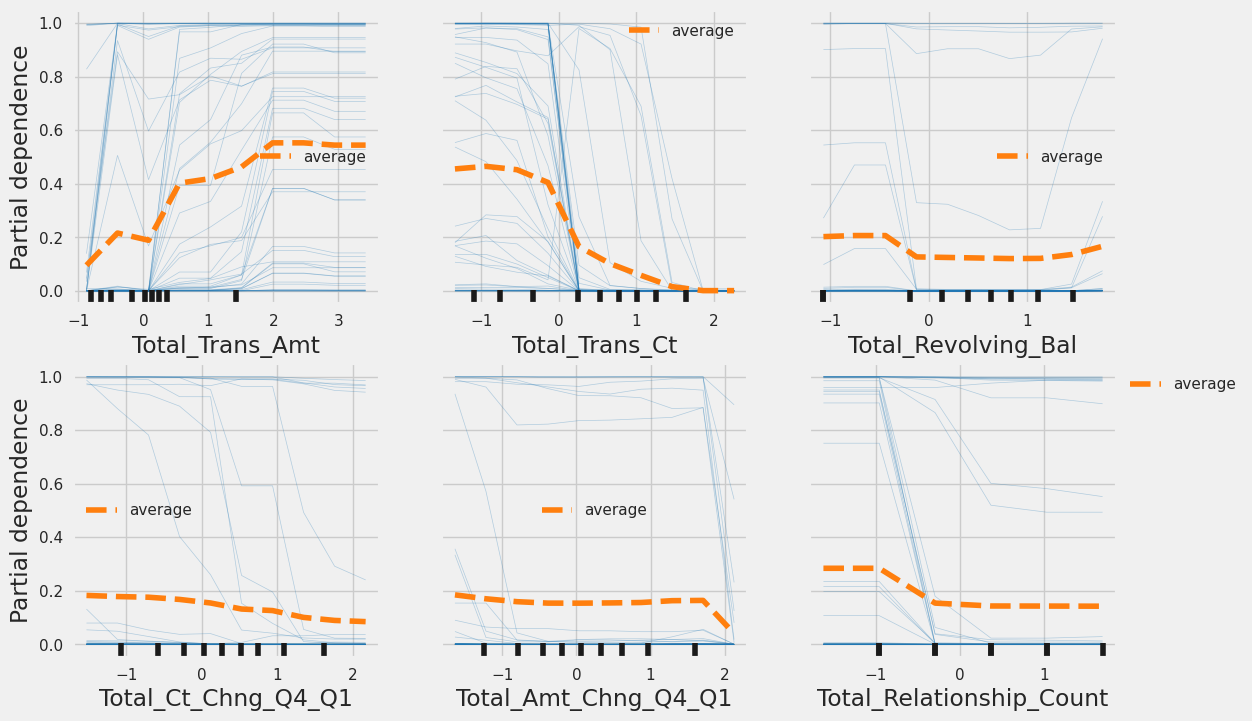

In [ ]:
# Univariate Partial Dependence Plot
n = 50
fig = plt.figure(figsize=(20, 20))
pdp_features = [ 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1',
                'Total_Amt_Chng_Q4_Q1','Total_Relationship_Count']
PartialDependenceDisplay.from_estimator(
  lgbm, X_test_std, pdp_features, kind="both", n_jobs=3, subsample=n, grid_resolution=10)
plt.legend(bbox_to_anchor=(1,1));

# Rerunning the model

In the light of feature importance, we tested two sample size: 4 features and 6 features by rerunning the LGBM model using 5-fold cross-validation. We dropped the 4 features model as its recall and F1 is slightly worse than the original model’s.

The results revealed that a model incorporating the following 6 features proved to be an excellent fit: When we reduce the predictors to only Total Transaction Amount, Total Transaction Count, Change in Transaction Count (Q4 over Q1), Change in Transaction Amount (Q4 over Q1), Total Revolving Balance on the Credit Card, Total Number of Products Customer Held, this refined model exhibited superior performance compared to the original model, boasting a higher recall value of 0.889 and a higher F1 score of 0.887. These metrics underscore the model's enhanced ability to accurately identify churned customers. The enhanced performance can also be shown in the increased proportion of false negative in confusion matrix.

Furthermore, a remarkable improvement was observed in the learning curve, with a noticeable reduce in the discrepancy between training and validation recall, now ranging from 0.96 to 1.0. Thus, reducing predictors makes LGBM better fit the data.

## 6 features

In [ ]:
selected_features_1 = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Relationship_Count']
X1 = X[selected_features_1]
X1_train, X1_test,y1_train,y1_test = train_test_split(X1,y_encoded, test_size=0.2, random_state=0)
smote = SMOTE(random_state=42)
X1_train_SMOTE, y1_train_SMOTE = smote.fit_resample(X1_train, y1_train)
col1_names = list(X1.columns)
s_scaler = StandardScaler()
X1_train_SMOTE_std = s_scaler.fit_transform(X1_train_SMOTE)
X1_test_std = s_scaler.transform(X1_test)


lgbm1 = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
lgbm1.fit(X1_train_SMOTE_std, np.ravel(y1_train_SOMTE))            # Fit model using training data. Ravel converts a column vector into the required 1D array format.
y1_pred = lgbm1.predict(X1_test_std)                                 # Apply model to test data
print('Logit: AUC = ', roc_auc_score(y1_test,y1_pred), ' recall =', recall_score(y_test, y_pred),' f1 = ', f1_score(y_test, y_pred))   # Test set accuracy
print(confusion_matrix(y_true=y1_test,y_pred=y1_pred))                           # Confusion matrix

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Logit: AUC =  0.9230142888646374  recall = 0.8738461538461538  f1 =  0.8304093567251463
[[1636   81]
 [  33  276]]


<Axes: >

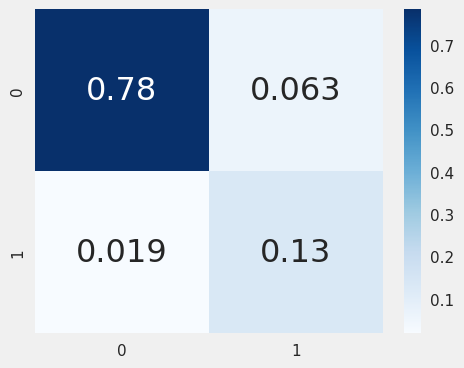

In [ ]:
plt.subplots(figsize=(5,4))
plt.xlabel('Confusion matrix')
cf_matrix = confusion_matrix(y_true=y2_test,y_pred=y2_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=plt.cm.Blues,annot = True, annot_kws = {'size':23})

### grid search

metrics score worse than original

In [ ]:
selected_features_1 = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Relationship_Count']
X1 = X[selected_features_1]
X1_train, X1_test,y1_train,y1_test = train_test_split(X1,y_encoded, test_size=0.2, random_state=0)
smote = SMOTE(random_state=42)
X1_train_SMOTE, y1_train_SOMTE = smote.fit_resample(X1_train, y1_train)
col1_names = list(X1.columns)
s_scaler = StandardScaler()
X1_train_SMOTE_std = s_scaler.fit_transform(X1_train_SMOTE)
X1_test_std = s_scaler.transform(X1_test)


lgbm1 = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=70, learning_rate=0.15, bagging_fraction=0.7, feature_fraction=0.7, reg_lambda=0.1)
lgbm1.fit(X1_train_SMOTE_std, np.ravel(y1_train_SOMTE))            # Fit model using training data. Ravel converts a column vector into the required 1D array format.
y1_pred = lgbm1.predict(X1_test_std)                                 # Apply model to test data
print('Logit: AUC = ', roc_auc_score(y1_test,y1_pred), ' recall =', recall_score(y_test, y_pred),' f1 = ', f1_score(y_test, y_pred))   # Test set accuracy
print(confusion_matrix(y_true=y1_test,y_pred=y1_pred))                           # Confusion matrix

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
Logit: AUC =  0.9240170162076174  recall = 0.8892307692307693  f1 =  0.8878648233486943
[[1645   72]
 [  34  275]]


### k-fold

metrics score worse than hold out sample

In [ ]:
names = ["Light GBM"]
classifiers = [
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)]

# Build each classifier using the unbalanced TRAINING data, show decision region and petrformance of the unbalanced TEST data
no_folds = 5 # number of folds desired for cross validation
kf = StratifiedKFold(n_splits=no_folds, shuffle=True, random_state=12345)
for name, clf in zip(names, classifiers):
  print('CLASSIFIER: ',name,'\n')
  mean_f1 = 0.0
  mean_recall = 0.0
  for fold, (train_index, test_index) in enumerate(kf.split(X1,y_encoded),1):
    X_train, X_test = X1.iloc[list(train_index)], X1.iloc[list(test_index)]
    y_train, y_test = y_encoded[list(train_index)], y_encoded[list(test_index)]
    sm = SMOTE()
    X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
    stdsc = StandardScaler()
    X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)
    X_test_std = stdsc.transform(X_test)
    clf.fit(X_train_SMOTE_std, y_train_SMOTE)
    y_pred = clf.predict(X_test_std)
    print(y_test)
    print(f'For fold {fold}:')
    print(f'Accuracy: {clf.score(X_test_std, y_test)}')
    print(f'AUC: {roc_auc_score(y_test, y_pred)}')
    print(f'F1: {f1_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    # mean_accuracy = mean_accuracy + clf.score(X_test_std, y_test)
    # mean_auc = mean_auc + roc_auc_score(y_test, y_pred)
    mean_f1 = mean_f1 + f1_score(y_test, y_pred)
    mean_recall = mean_recall + recall_score(y_test, y_pred)
  # mean_accuracy = mean_accuracy / no_folds
  # mean_auc = mean_auc / no_folds
  mean_f1 = mean_f1 / no_folds
  mean_recall = mean_recall / no_folds
  print('Average F1: %.3f Average recall: %.3f\n\n' % (mean_f1, mean_recall))

CLASSIFIER:  Light GBM 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[0 0 0 ... 0 1 1]
For fold 1:
Accuracy: 0.941263573543929
AUC: 0.9141753879465897
F1: 0.8272859216255444
Recall: 0.8742331288343558
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[0 0 0 ... 1 1 0]
For fold 2:
Accuracy: 0.9432379072063178
AUC: 0.9153518585348249
F1: 0.8321167883211678
Recall: 0.8742331288343558
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fractio

Test Mean:  [ nan 0.92 0.95 0.96 0.97]


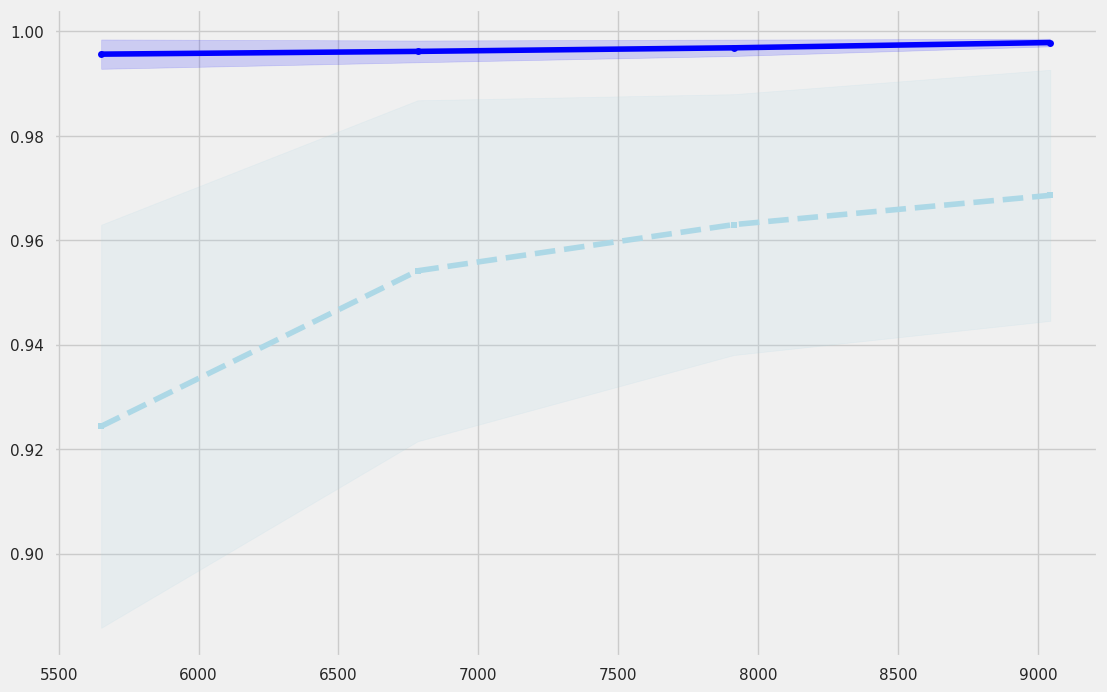

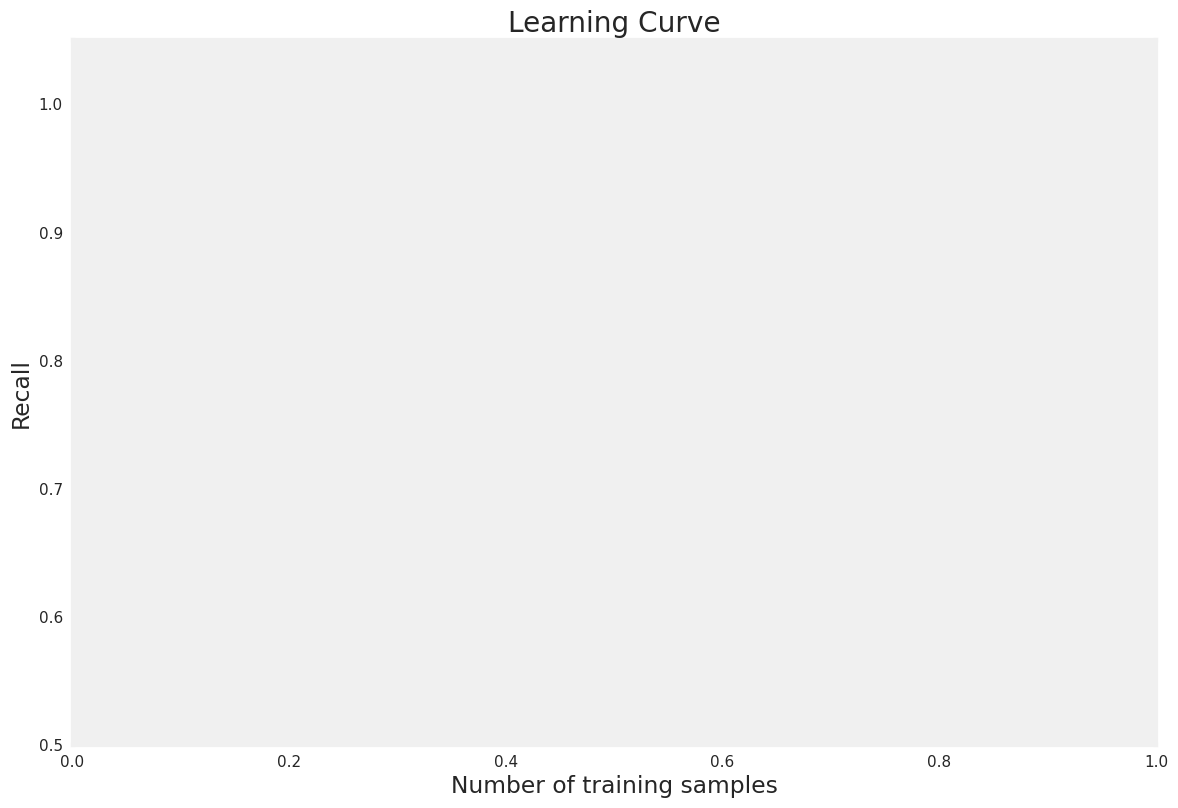

In [ ]:
model = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2))])

train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                               X=X1_train_SMOTE_std,
                               y=y1_train_SMOTE,
                               train_sizes=np.linspace(0.5, 1.0, 5),
                               scoring='recall',
                               cv=3,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


print('Test Mean: ',test_mean)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training recall')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='lightblue', linestyle='--',
         marker='s', markersize=5,
         label='validation recall')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='lightblue')

plt.figure(facecolor='white')  # 设置背景色为白色
plt.grid()  # 添加网格线
plt.xlabel('Number of training samples')
plt.ylabel('Recall')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.title('Learning Curve')
plt.legend(loc='best')

## 4 features

In [ ]:
selected_features_2 = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1']
X2 = X[selected_features_2]
X2_train, X2_test,y2_train,y2_test = train_test_split(X2,y_encoded, test_size=0.2, random_state=0)
smote = SMOTE(random_state=42)
X2_train_SMOTE, y2_train_SMOTE = smote.fit_resample(X2_train, y2_train)
col1_names = list(X2.columns)
s_scaler = StandardScaler()
X2_train_SMOTE_std = s_scaler.fit_transform(X2_train_SMOTE)
X2_test_std = s_scaler.transform(X2_test)


lgbm2 = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
lgbm2.fit(X2_train_SMOTE_std, np.ravel(y2_train_SMOTE))            # Fit model using training data. Ravel converts a column vector into the required 1D array format.
y2_pred = lgbm2.predict(X2_test_std)                                 # Apply model to test data
print('Logit: AUC = ', roc_auc_score(y2_test,y2_pred), ' recall =', recall_score(y_test, y_pred),' f1 = ', f1_score(y_test, y_pred))   # Test set accuracy
print(confusion_matrix(y_true=y2_test,y_pred=y2_pred))                           # Confusion matrix

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Logit: AUC =  0.901528216785128  recall = 0.8738461538461538  f1 =  0.8304093567251463
[[1590  127]
 [  38  271]]


In [ ]:
model = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2))])

train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                               X=X2_train_SMOTE_std,
                               y=y2_train_SMOTE,
                               train_sizes=np.linspace(0.5, 1.0, 5),
                               scoring='recall',
                               cv=3,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


print('Test Mean: ',test_mean)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training recall')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='lightblue', linestyle='--',
         marker='s', markersize=5,
         label='validation recall')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='lightblue')

plt.figure(facecolor='white')  # 设置背景色为白色
plt.grid()  # 添加网格线
plt.xlabel('Number of training samples')
plt.ylabel('Recall')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
plt.subplots(figsize=(5,4))
plt.xlabel('Confusion matrix')
cf_matrix = confusion_matrix(y_true=y2_test,y_pred=y2_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=plt.cm.Blues,annot = True, annot_kws = {'size':15})


In [ ]:
selected_features = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1']
X_subset = X[selected_features]
feature_subset_sizes = range(1, len(selected_features) + 1)
train_scores = []
val_scores = []

for subset_size in feature_subset_sizes:
    selected_features_subset = selected_features[:subset_size]
    X_subset = X[selected_features_subset]

    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_subset, y_encoded, test_size=0.2, random_state=0)

    # Train the model
    clf = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
    clf.fit(X_train, y_train)

    # Evaluate performance on training and validation sets
    train_score = clf.score(X_train, y_train)
    val_score = clf.score(X_val, y_val)

    train_scores.append(train_score)
    val_scores.append(val_score)

# Plot the learning curve
plt.plot(feature_subset_sizes, train_scores, label='Train')
plt.plot(feature_subset_sizes, val_scores, label='Validation')
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Feature Subset Sizes')
plt.legend()
plt.show()